In [1]:
# !pip install statsmodels pingouin

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
import re

### Experiment 1 Trends over Time

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_1/exp1_with_hplc_data_results.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info()

In [2]:
import matplotlib.pyplot as plt

# Select relevant columns
time_col = "DAF"  # Days After Flowering
cannabinoid_cols = [
    "Total CBD", "Total THC", "Total CBG", "Total THCV", 
    "Total CBDV", "Total CBGV", "Total CBC", "Total Cannabinoids"
]

# Drop rows with missing values in the selected columns
df_filtered = df[[time_col] + cannabinoid_cols].dropna()

# Sort by time for proper trend visualization
df_filtered = df_filtered.sort_values(by=time_col)

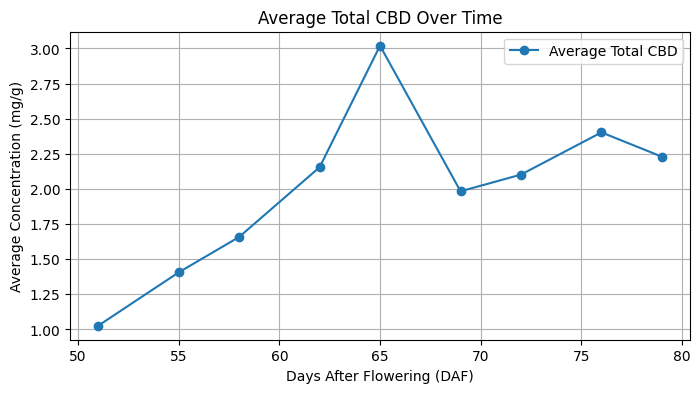

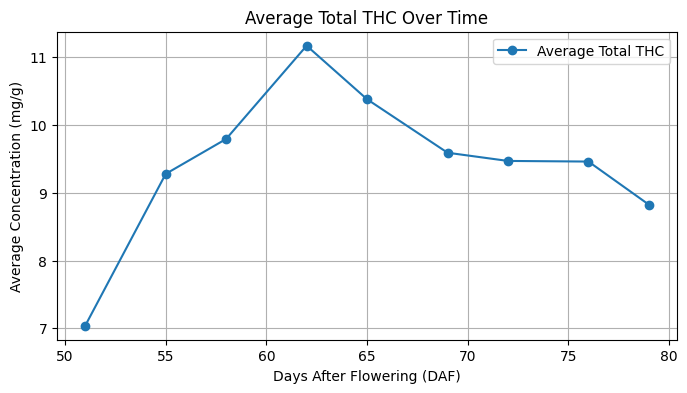

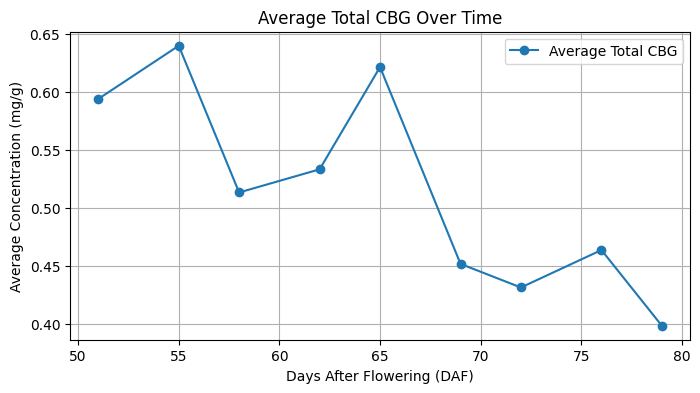

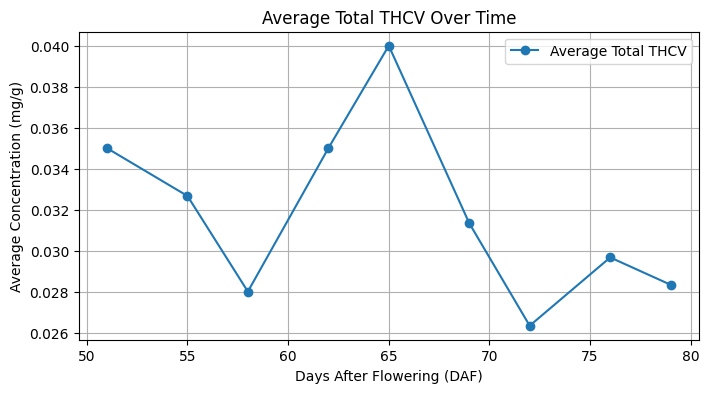

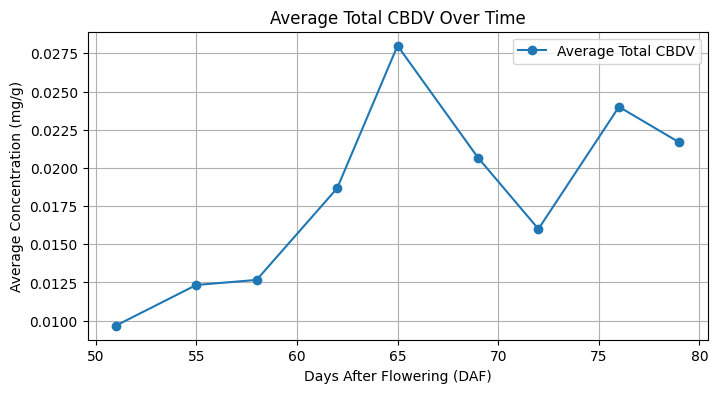

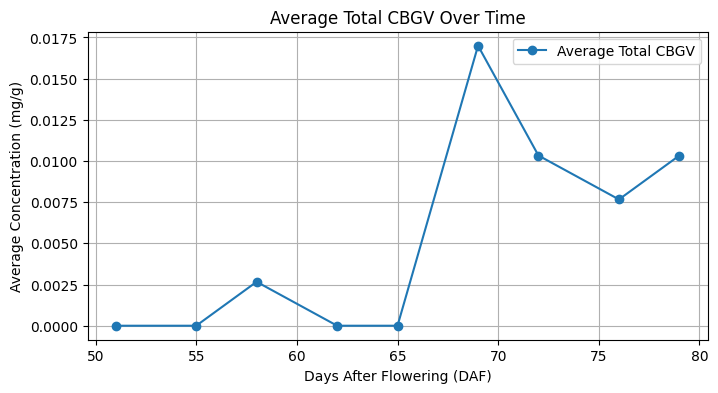

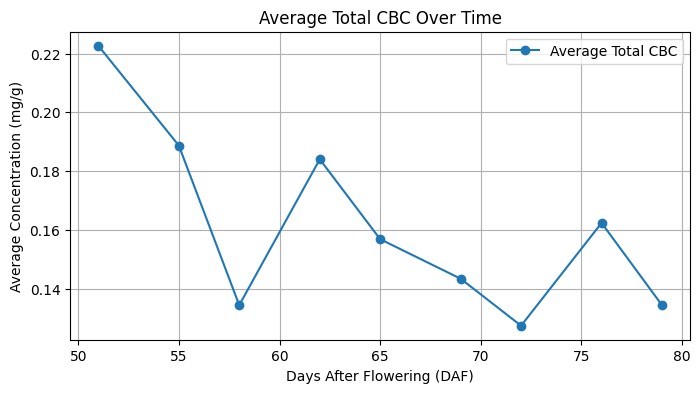

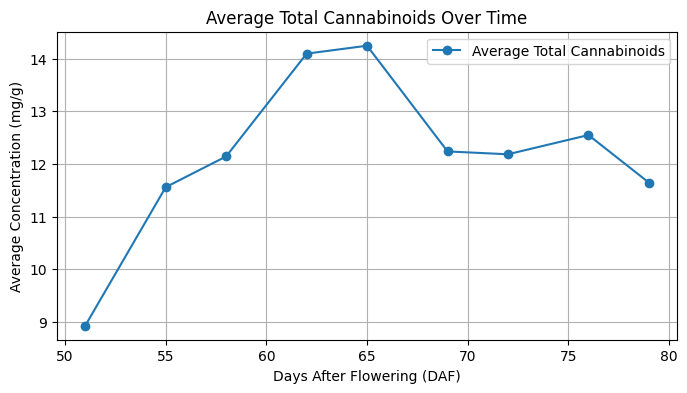

In [3]:
# Compute the average cannabinoid levels over time
df_avg = df_filtered.groupby(time_col)[cannabinoid_cols].mean().reset_index()

# Create separate plots for each cannabinoid variable
for col in cannabinoid_cols:
    plt.figure(figsize=(8, 4))
    plt.plot(df_avg[time_col], df_avg[col], marker='o', linestyle='-', label=f"Average {col}")
    plt.xlabel("Days After Flowering (DAF)")
    plt.ylabel("Average Concentration (mg/g)")
    plt.title(f"Average {col} Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()


### Experiment 2 Trend over Time

In [4]:
import pandas as pd

# Load the Excel file
file_path = "/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_2/cannabinoids_exp2_clean.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names
xls.sheet_names

# Load and preview the first few rows of each sheet
sheet1_df = xls.parse("Sheet1")
sheet2_df = xls.parse("Sheet2")

# Extracting time periods based on the "Chromatogram Name" column
sheet1_df = sheet1_df.rename(columns={sheet1_df.columns[0]: "Chromatogram_Name"})
sheet2_df = sheet2_df.rename(columns={sheet2_df.columns[0]: "Chromatogram_Name"})

# Assign a time period index (each 15 rows correspond to one period)
sheet1_df["Time_Period"] = (sheet1_df.index // 15) + 1
sheet2_df["Time_Period"] = (sheet2_df.index // 15) + 1

# Calculate average values for each time period
avg_sheet1 = sheet1_df.groupby("Time_Period").mean(numeric_only=True)
avg_sheet2 = sheet2_df.groupby("Time_Period").mean(numeric_only=True)

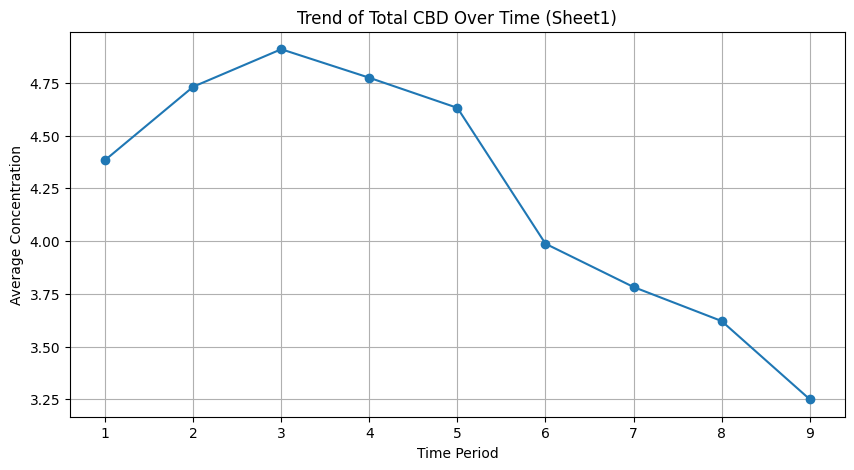

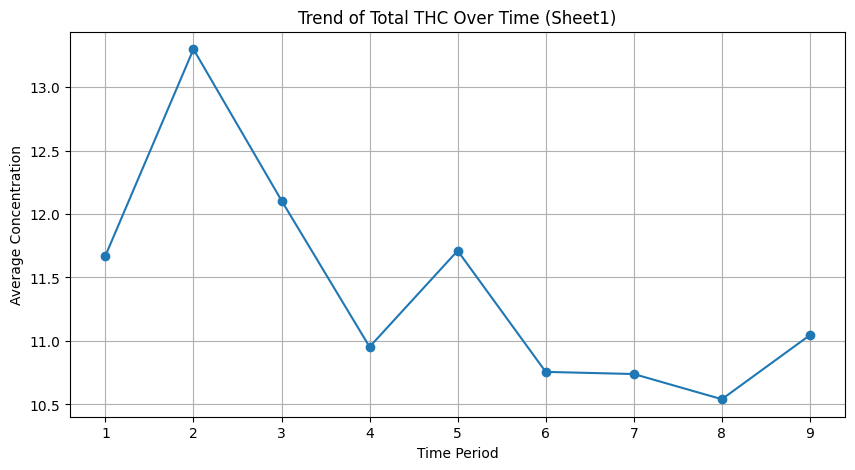

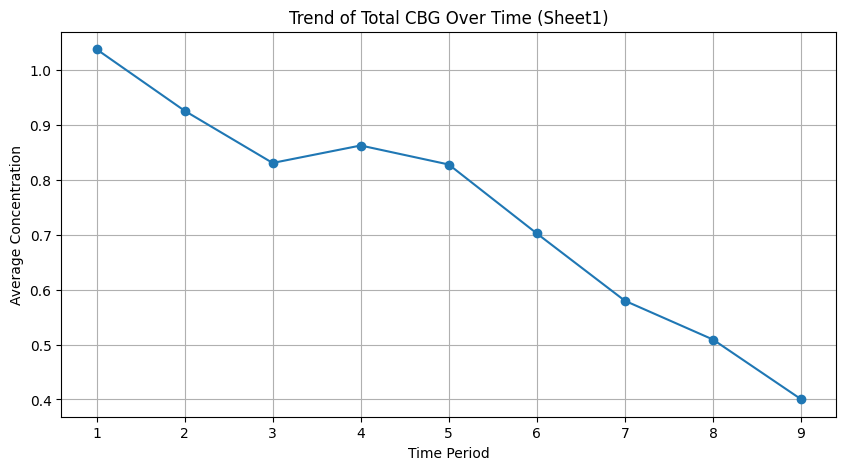

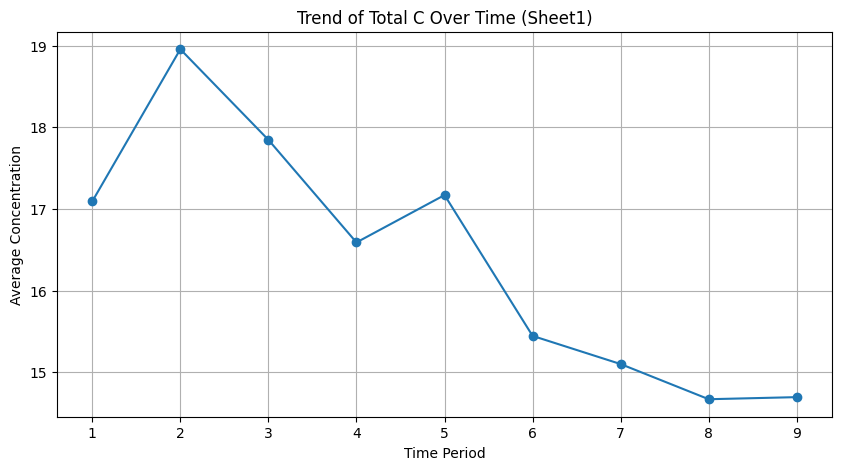

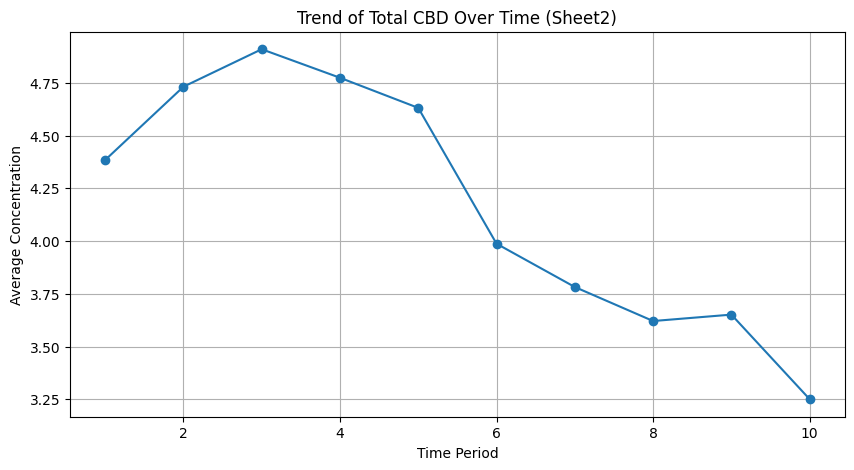

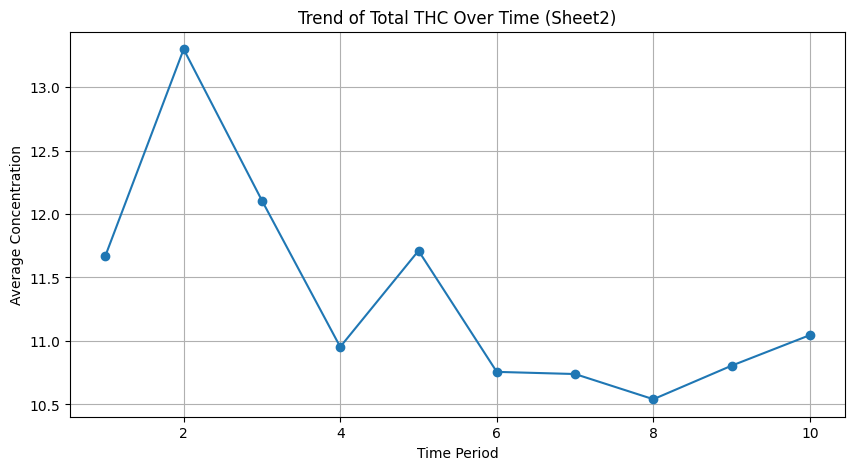

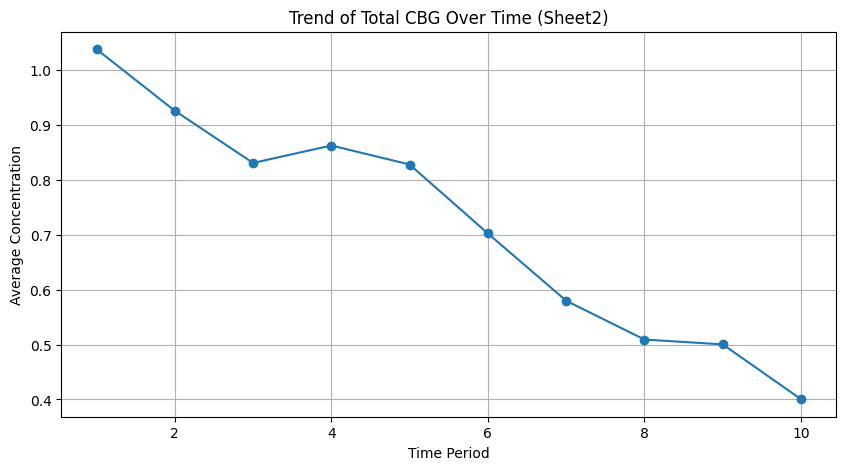

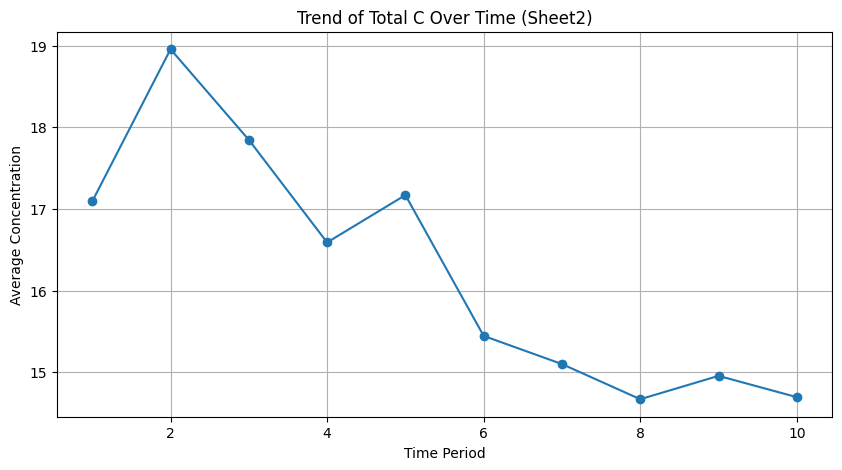

In [5]:
# Plot each cannabinoid separately for Sheet1
for column in ["Total CBD", "Total THC", "Total CBG", "Total C"]:
    plt.figure(figsize=(10, 5))
    plt.plot(avg_sheet1.index, avg_sheet1[column], marker="o", linestyle="-")
    plt.xlabel("Time Period")
    plt.ylabel("Average Concentration")
    plt.title(f"Trend of {column} Over Time (Sheet1)")
    plt.grid(True)
    plt.show()

# Plot each cannabinoid separately for Sheet2
for column in ["Total CBD", "Total THC", "Total CBG", "Total C"]:
    plt.figure(figsize=(10, 5))
    plt.plot(avg_sheet2.index, avg_sheet2[column], marker="o", linestyle="-")
    plt.xlabel("Time Period")
    plt.ylabel("Average Concentration")
    plt.title(f"Trend of {column} Over Time (Sheet2)")
    plt.grid(True)
    plt.show()


### Analysis of the trichomes vs cannabinoids

In [2]:
def clean_and_merge_datasets(trichome_path, cannabinoid_path):
    """
    Cleans and merges the trichome class distribution dataset with the cannabinoid levels dataset.
    """
    # Load the datasets
    trichome_df = pd.read_csv(trichome_path)
    cannabinoid_df = pd.read_excel(cannabinoid_path)

    # Clean column names in cannabinoid dataset
    cannabinoid_df.columns = cannabinoid_df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Rename flower identifier column for consistency
    cannabinoid_df.rename(columns={'chromatogram\n_name': 'flower_id'}, inplace=True)

    # Ensure `day` in trichome dataset is in a consistent format (extract just the day number)
    trichome_df['day'] = trichome_df['day'].str.extract(r'day_(\d+)_\d{4}_\d{2}_\d{2}').astype(int)

    # Convert flower numbers to a common identifier
    trichome_df.rename(columns={'number': 'flower_id'}, inplace=True)

    # Convert flower_id to string for consistent merging
    trichome_df['flower_id'] = trichome_df['flower_id'].astype(str)
    cannabinoid_df['flower_id'] = cannabinoid_df['flower_id'].astype(str)

    # Extract numeric flower ID from the cannabinoid dataset (assuming format like 'XX-N')
    cannabinoid_df['flower_id'] = cannabinoid_df['flower_id'].apply(
        lambda x: re.search(r'(\d+)$', x).group(1) if re.search(r'(\d+)$', x) else x
    )

    # Merge datasets on flower_id and day
    merged_df = pd.merge(trichome_df, cannabinoid_df, on='flower_id', how='inner')

    return merged_df

# Run the function on the uploaded datasets
trichome_data_path = "/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/collected_class_distribution_per_folder.csv"
cannabinoid_data_path = "/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_2/cannabinoids_exp2_clean.xlsx"

merged_df = clean_and_merge_datasets(trichome_data_path, cannabinoid_data_path)
merged_df.head()


day    location flower_id  clear_count  cloudy_count  amber_count  \
0    1  greenhouse        15          147          1575           18   
1    1  greenhouse        14          271          1395           12   
2    1  greenhouse        13           86          2315           43   
3    1  greenhouse        12          165          1797            9   
4    1  greenhouse        11          320          1129           10   

   clear_normalized  cloudy_normalized  amber_normalized     var       rep  \
0            0.0845             0.9052            0.0103     616     616-8   
1            0.1615             0.8313            0.0072  1416-3  1416-3-7   
2            0.0352             0.9472            0.0176  805-12  805-12-6   
3            0.0837             0.9117            0.0046     616     616-6   
4            0.2193             0.7738            0.0069  1416-3  1416-3-5   

   total_cbd  total_thc  total_cbg    total_c  
0   0.271170  16.478827   1.155735  17.905733  
1   0.380153  15.803839   1.430155  17.614146  
2  13.402300   4.381778   0.905328  18.689406  
3   0.329670  16.614643   1.094124  18.038437  
4   0.317067  16.111711   1.305174  17.733953

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                239 non-null    int64  
 1   location           239 non-null    object 
 2   flower_id          239 non-null    object 
 3   clear_count        239 non-null    int64  
 4   cloudy_count       239 non-null    int64  
 5   amber_count        239 non-null    int64  
 6   clear_normalized   239 non-null    float64
 7   cloudy_normalized  239 non-null    float64
 8   amber_normalized   239 non-null    float64
 9   var                239 non-null    object 
 10  rep                239 non-null    object 
 11  total_cbd          239 non-null    float64
 12  total_thc          239 non-null    float64
 13  total_cbg          239 non-null    float64
 14  total_c            239 non-null    float64
dtypes: float64(7), int64(4), object(4)
memory usage: 28.1+ KB


Saving the merged csv

In [4]:
# merged_df.to_csv("/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_2/trichomes_cannabinoids_merged__adv_model_exp2.csv", index=False)

In [5]:
# Assuming merged_df is your DataFrame

# Create a DataFrame for the greenhouse location
df_greenhouse = merged_df[merged_df['location'] == 'greenhouse'].copy()

# Create a DataFrame for the lab location
df_lab = merged_df[merged_df['location'] == 'lab'].copy()

## Correlation Analysis

In [6]:
corr_columns = ['clear_normalized', 'cloudy_normalized', 'amber_normalized', 
                'total_cbd', 'total_thc', 'total_cbg', 'total_c']

# Define groups of interest
trichome_vars = ['clear_normalized', 'cloudy_normalized', 'amber_normalized']
hplc_vars = ['total_cbd', 'total_thc', 'total_cbg', 'total_c']

### All data together

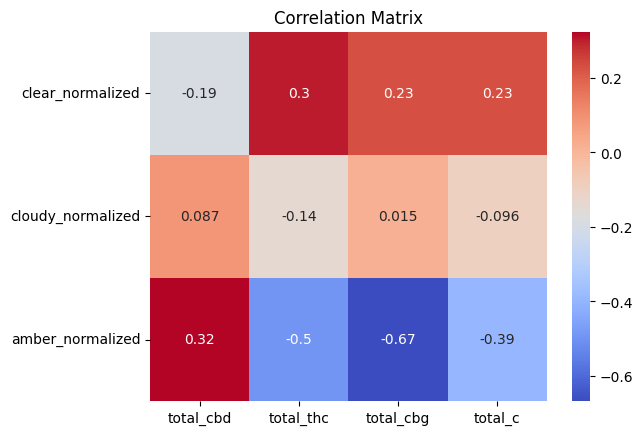

In [7]:
corr_matrix = merged_df[corr_columns].corr()
corr_matrix = corr_matrix.loc[trichome_vars, hplc_vars]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation in each shooting location

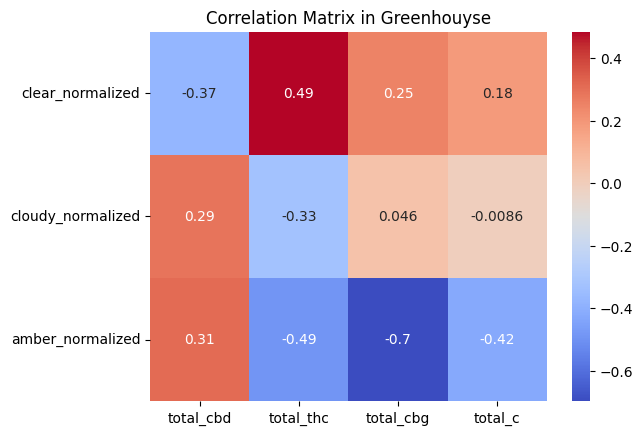

In [8]:
corr_matrix = df_greenhouse[corr_columns].corr()
corr_matrix = corr_matrix.loc[trichome_vars, hplc_vars]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix in Greenhouyse')
plt.show()

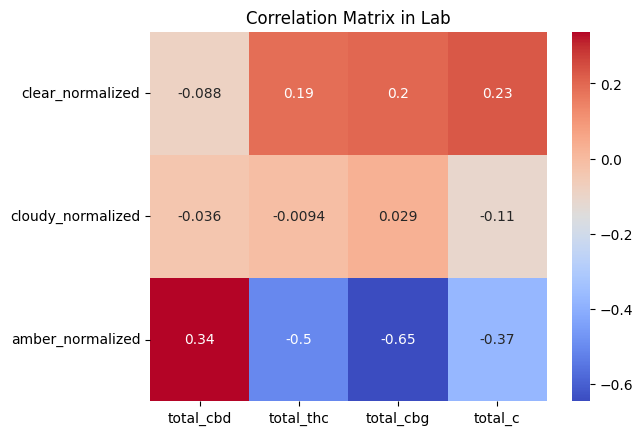

In [9]:
corr_matrix = df_lab[corr_columns].corr()
corr_matrix = corr_matrix.loc[trichome_vars, hplc_vars]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix in Lab')
plt.show()

In [10]:
def plot_variety_heatmaps(df, var_col, corr_columns, trichome_vars, hplc_vars, max_cols=3):
    """
    Plots correlation heatmaps for each unique variety in the dataset.
    """
    # Get the unique varieties
    variations = df[var_col].unique()
    num_vars = len(variations)

    # Determine grid layout
    cols = min(num_vars, max_cols)
    rows = (num_vars // cols) + (num_vars % cols > 0)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

    # Flatten axes array if needed
    if num_vars > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Convert single axis to list for iteration

    # Loop over each variety and generate the heatmap
    for i, var in enumerate(variations):
        df_var = df[df[var_col] == var]  # Subset the data
        corr_matrix = df_var[corr_columns].corr()  # Compute correlation matrix
        corr_matrix = corr_matrix.loc[trichome_vars, hplc_vars]  # Select specific correlations

        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
        axes[i].set_title(f'Correlation for Variety: {var}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()


#### Corr matrix for variations in both shooting locations

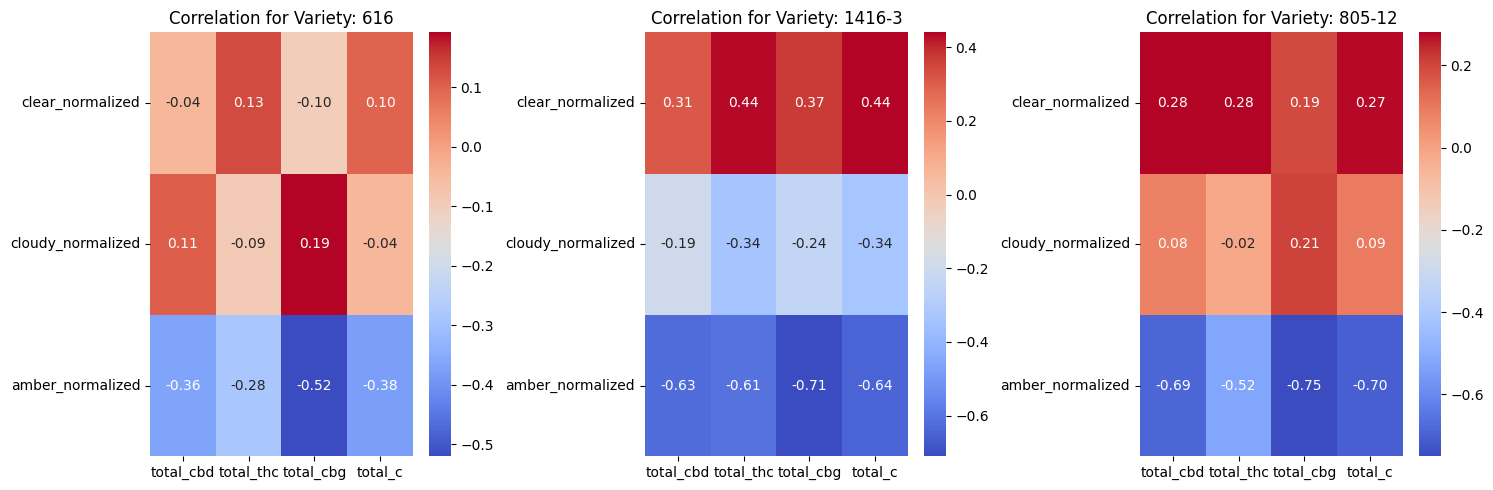

In [11]:
plot_variety_heatmaps(merged_df, 'var', corr_columns, trichome_vars, hplc_vars)

#### Corr matrix for variations in Greenhouse

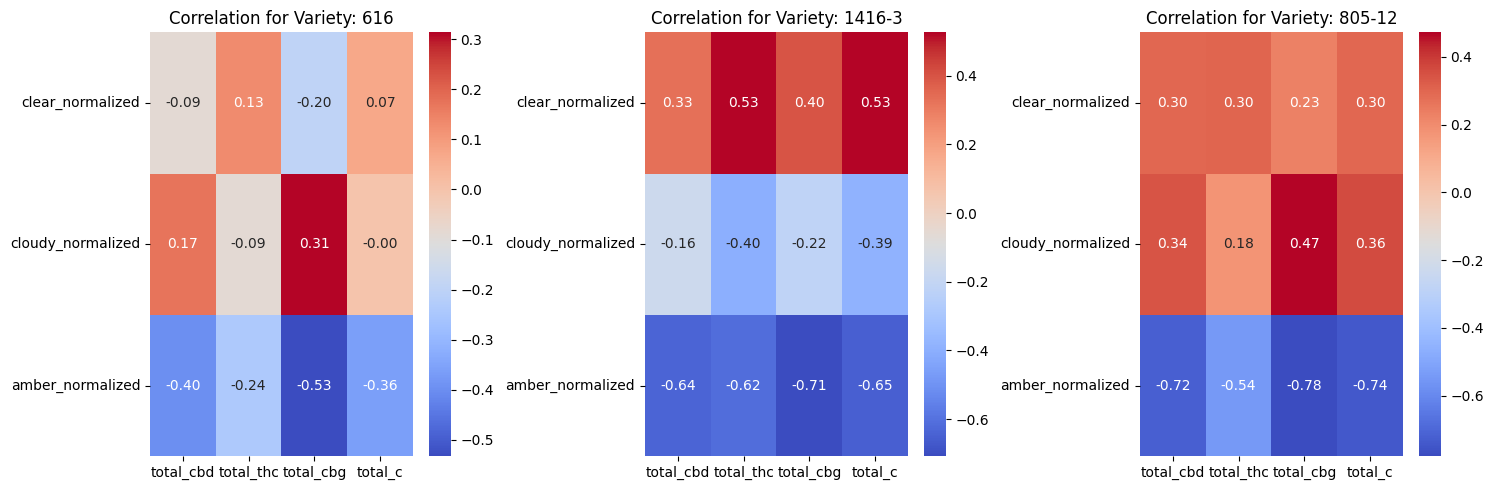

In [12]:
plot_variety_heatmaps(df_greenhouse, 'var', corr_columns, trichome_vars, hplc_vars)

#### Corr matrix for variations in Lab

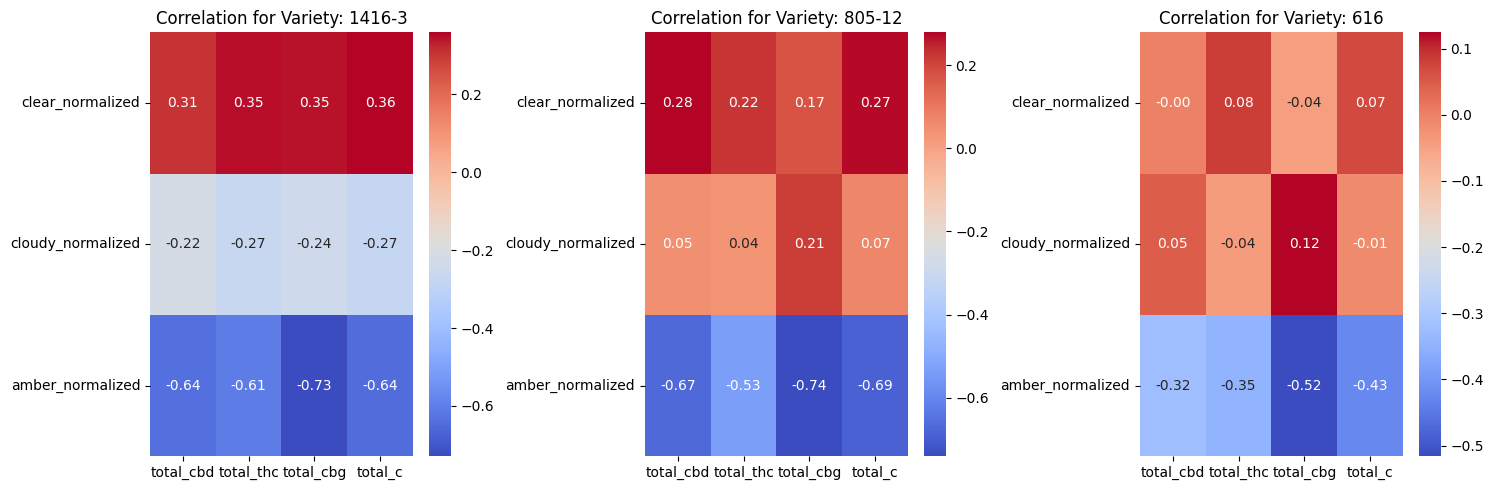

In [13]:
plot_variety_heatmaps(df_lab, 'var', corr_columns, trichome_vars, hplc_vars)

### Correlation over Time

In [14]:
# Calculate rolling correlation over time using a different approach
time_correlation_results = []

# Iterate over each day and compute correlations
for day, group in merged_df.groupby("day"):
    correlation_matrix = group[["clear_normalized", "cloudy_normalized", "amber_normalized", 
                                "total_cbd", "total_thc", "total_c"]].corr()
    
    # Extract correlations between trichome distributions and cannabinoids
    for trichome in ["clear_normalized", "cloudy_normalized", "amber_normalized"]:
        for cannabinoid in ["total_cbd", "total_thc", "total_c"]:
            time_correlation_results.append({
                "day": day,
                "trichome_type": trichome,
                "cannabinoid": cannabinoid,
                "correlation": correlation_matrix.loc[trichome, cannabinoid]
            })

# Convert results into a DataFrame
time_correlation_df = pd.DataFrame(time_correlation_results)
time_correlation_df


day      trichome_type cannabinoid  correlation
0     1   clear_normalized   total_cbd    -0.475934
1     1   clear_normalized   total_thc     0.392289
2     1   clear_normalized     total_c    -0.222662
3     1  cloudy_normalized   total_cbd     0.372914
4     1  cloudy_normalized   total_thc    -0.294793
..  ...                ...         ...          ...
76    9  cloudy_normalized   total_thc     0.416136
77    9  cloudy_normalized     total_c    -0.156668
78    9   amber_normalized   total_cbd     0.862776
79    9   amber_normalized   total_thc    -0.916652
80    9   amber_normalized     total_c    -0.558509

[81 rows x 4 columns]

### Correlation over time

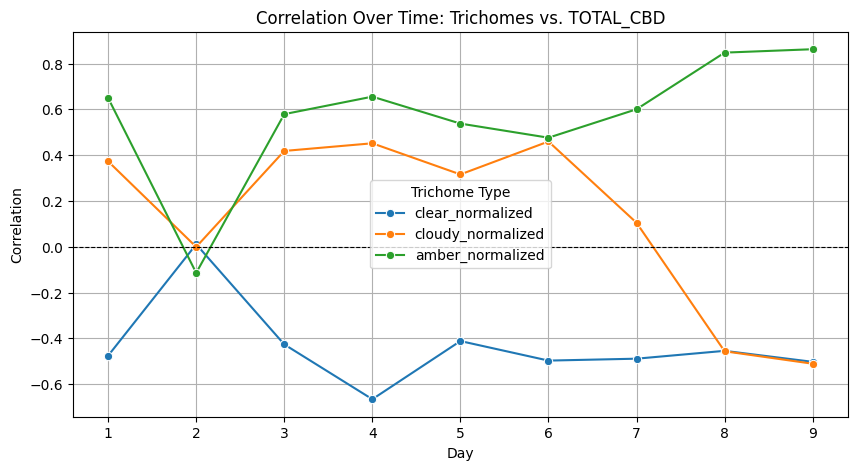

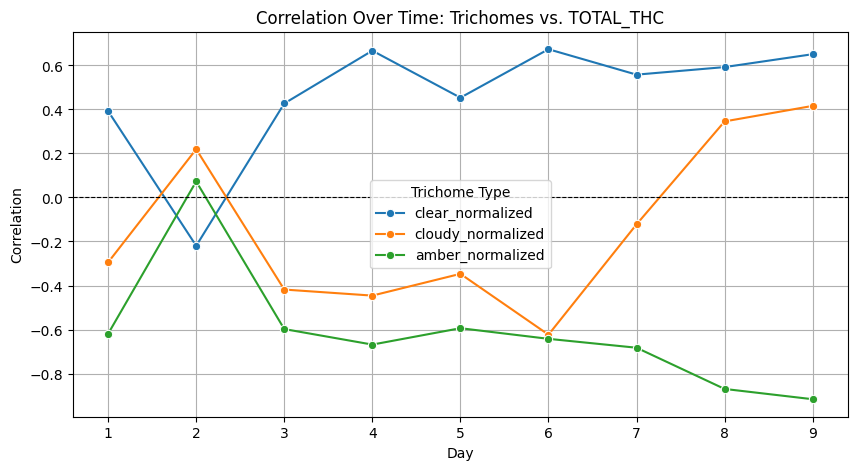

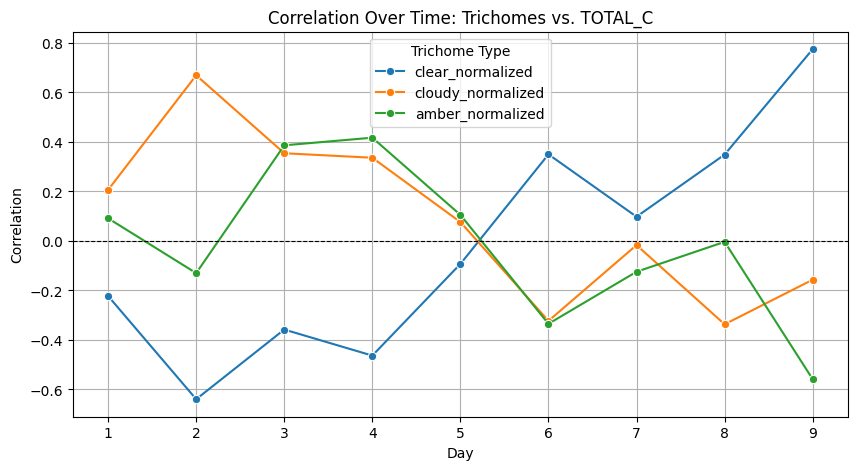

In [15]:
# Define cannabinoids for separate plots
cannabinoids = ["total_cbd", "total_thc", "total_c"]

# Plot each cannabinoid separately
for cannabinoid in cannabinoids:
    plt.figure(figsize=(10, 5))
    subset = time_correlation_df[time_correlation_df["cannabinoid"] == cannabinoid]
    sns.lineplot(data=subset, x="day", y="correlation", hue="trichome_type", marker="o")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
    plt.title(f"Correlation Over Time: Trichomes vs. {cannabinoid.upper()}")
    plt.xlabel("Day")
    plt.ylabel("Correlation")
    plt.legend(title="Trichome Type")
    plt.grid(True)
    plt.show()


### Changes of the variables over time

In [16]:
# Define variables for analysis
cannabinoids = ["total_cbd", "total_thc", "total_cbg", "total_c"]
trichome_counts = ["clear_normalized", "cloudy_normalized", "amber_normalized"]
split_factors = ["location", "var"]

# Extract the relevant columns for analysis
selected_columns = ["day", "location", "var"] + trichome_counts + cannabinoids

# Filter and sort data
split_value_df = merged_df[selected_columns].sort_values(by=["day", "location", "var"])

# Define variables for plotting
split_categories = split_value_df["location"].unique()
flower_variations = split_value_df["var"].unique()


In [17]:
cannabinoids

['total_cbd', 'total_thc', 'total_cbg', 'total_c']

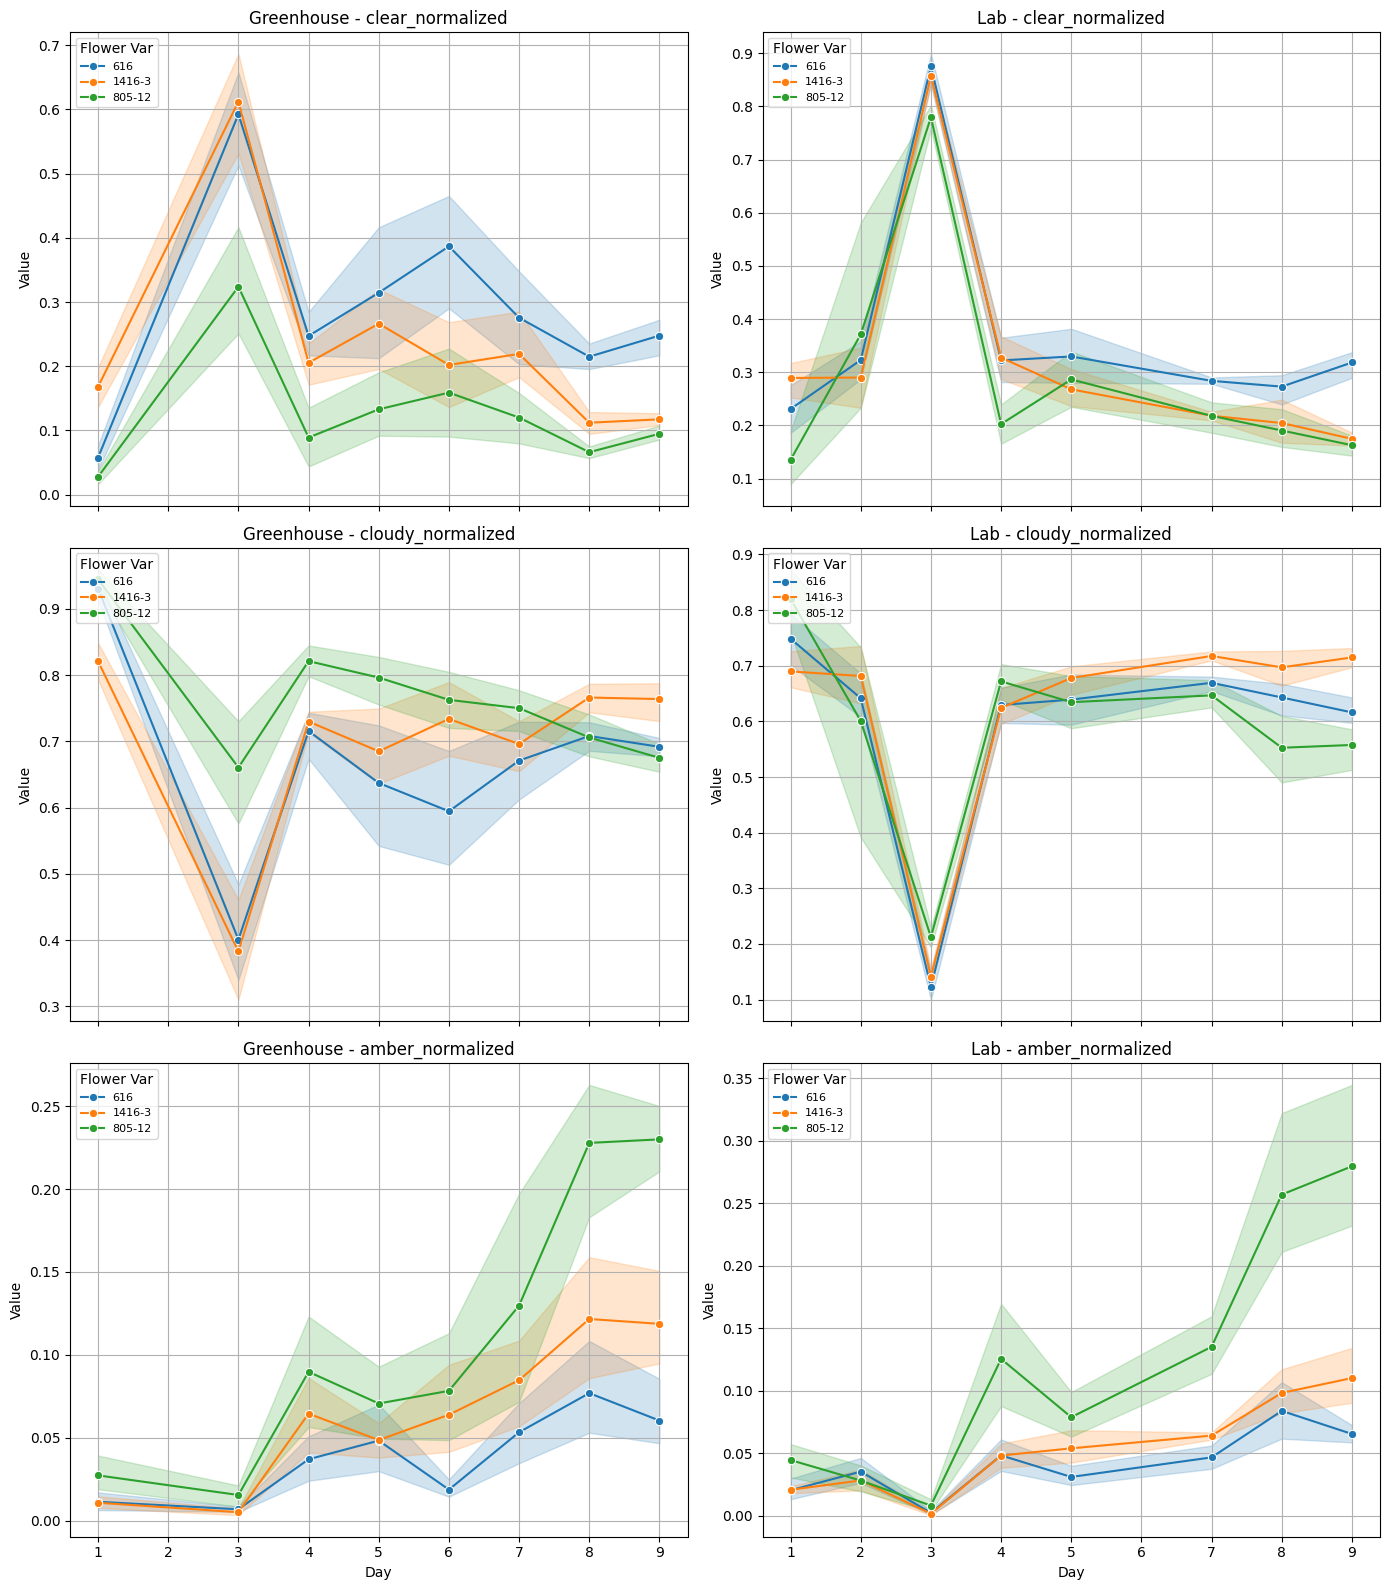

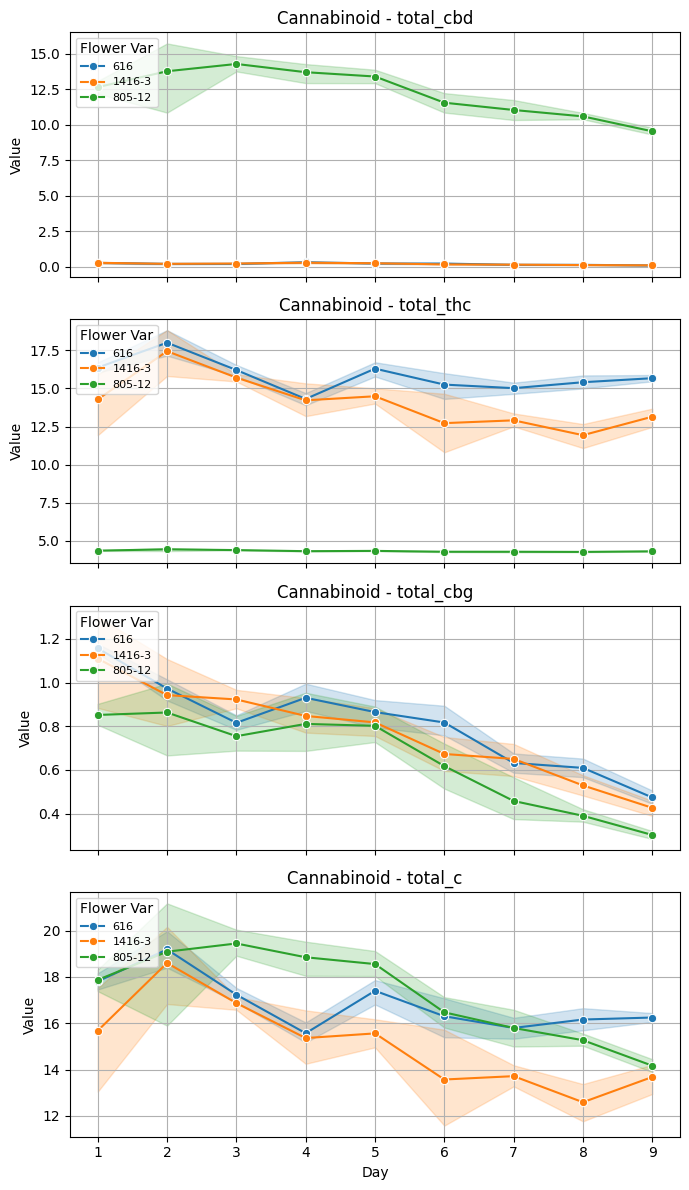

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of rows
num_trichomes = len(trichome_counts)
num_cannabinoids = len(cannabinoids)

# Create a figure with 2 columns: 
# - Left column for greenhouse trichome plots
# - Right column for lab trichome plots
fig, axes = plt.subplots(num_trichomes, 2, figsize=(14, 16), sharex=True, gridspec_kw={'width_ratios': [1, 1]})


# Plot trichome-related variables (split by location)
for idx, variable in enumerate(trichome_counts):
    for col_idx, location in enumerate(split_categories):  # Greenhouse / Lab
        ax = axes[idx, col_idx]
        subset_location = split_value_df[split_value_df["location"] == location]

        for flower_var in flower_variations:
            subset = subset_location[subset_location["var"] == flower_var]
            if not subset.empty:
                sns.lineplot(data=subset, x="day", y=variable, label=f"{flower_var}", marker="o", ax=ax)

        ax.set_title(f"{location.capitalize()} - {variable}")
        ax.set_xlabel("Day")
        ax.set_ylabel("Value")
        ax.legend(title="Flower Var", fontsize=8, loc="upper left")
        ax.grid(True)

# Add a separate **full-width** subplot for cannabinoids
fig_cannabinoids, ax_cannabinoids = plt.subplots(len(cannabinoids), 1, figsize=(7, len(cannabinoids) * 3), sharex=True)

# Flatten axes in case there's only one row
if len(cannabinoids) == 1:
    ax_cannabinoids = [ax_cannabinoids]

# Plot cannabinoid-related variables (only once, not split by location)
for idx, variable in enumerate(cannabinoids):
    for flower_var in flower_variations:
        subset = split_value_df[split_value_df["var"] == flower_var]
        if not subset.empty:
            sns.lineplot(data=subset, x="day", y=variable, label=f"{flower_var}", marker="o", ax=ax_cannabinoids[idx])

    ax_cannabinoids[idx].set_title(f"Cannabinoid - {variable}")
    ax_cannabinoids[idx].set_xlabel("Day")
    ax_cannabinoids[idx].set_ylabel("Value")
    ax_cannabinoids[idx].legend(title="Flower Var", fontsize=8, loc="upper left")
    ax_cannabinoids[idx].grid(True)

# Adjust layout
plt.tight_layout()
fig.tight_layout()
fig_cannabinoids.tight_layout()
plt.show()


## Dynamics of Cannabinoid Accumulation
Objective: Investigate how cannabinoid levels (e.g., THC, CBD, CBG) change over time as trichomes transition from clear to cloudy to amber.

### Key Questions:

How do cannabinoid profiles evolve during each stage of trichome maturity?

Is there a critical window where specific cannabinoids peak in concentration?

Potential Insights: This could help optimize harvest timing for specific cannabinoid profiles, such as maximizing CBG by harvesting during the clear trichome stage.

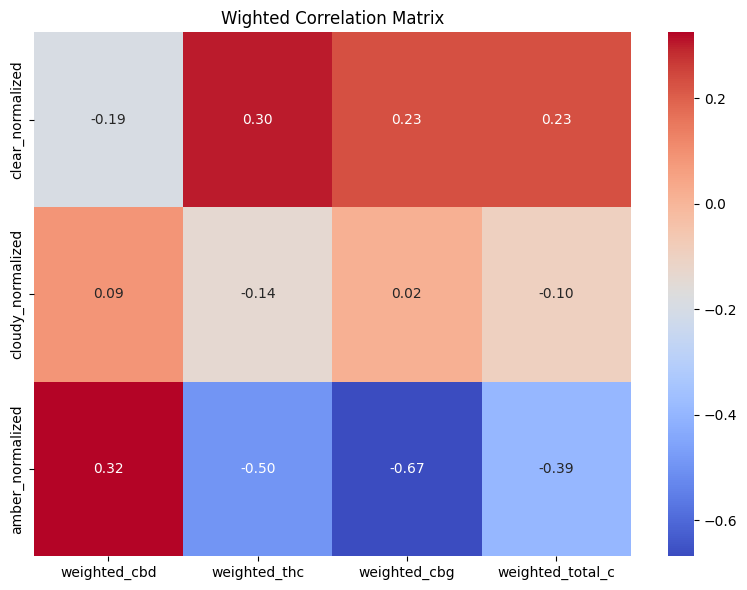

In [19]:
import numpy as np

# Compute weighted averages of cannabinoids based on trichome proportions
merged_df["weighted_cbd"] = merged_df["clear_normalized"] * merged_df["total_cbd"] + merged_df["cloudy_normalized"] * merged_df["total_cbd"] + merged_df["amber_normalized"] * merged_df["total_cbd"]
merged_df["weighted_thc"] = merged_df["clear_normalized"] * merged_df["total_thc"] + merged_df["cloudy_normalized"] * merged_df["total_thc"] + merged_df["amber_normalized"] * merged_df["total_thc"]
merged_df["weighted_cbg"] = merged_df["clear_normalized"] * merged_df["total_cbg"] + merged_df["cloudy_normalized"] * merged_df["total_cbg"] + merged_df["amber_normalized"] * merged_df["total_cbg"]
merged_df["weighted_total_c"] = merged_df["clear_normalized"] * merged_df["total_c"] + merged_df["cloudy_normalized"] * merged_df["total_c"] + merged_df["amber_normalized"] * merged_df["total_c"]

# Compute correlations between trichome proportions and cannabinoid levels
weighted_correlation = merged_df[["clear_normalized", "cloudy_normalized", "amber_normalized", 
                        "weighted_cbd", "weighted_thc", "weighted_cbg", "weighted_total_c"]].corr()

weighted_hplc_cols = ["weighted_cbd", "weighted_thc", "weighted_cbg", "weighted_total_c"]

weighted_correlation = weighted_correlation.loc[trichome_vars, weighted_hplc_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(weighted_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Wighted Correlation Matrix')
plt.tight_layout()
plt.show()

In [20]:
merged_df.columns

Index(['day', 'location', 'flower_id', 'clear_count', 'cloudy_count',
       'amber_count', 'clear_normalized', 'cloudy_normalized',
       'amber_normalized', 'var', 'rep', 'total_cbd', 'total_thc', 'total_cbg',
       'total_c', 'weighted_cbd', 'weighted_thc', 'weighted_cbg',
       'weighted_total_c'],
      dtype='object')

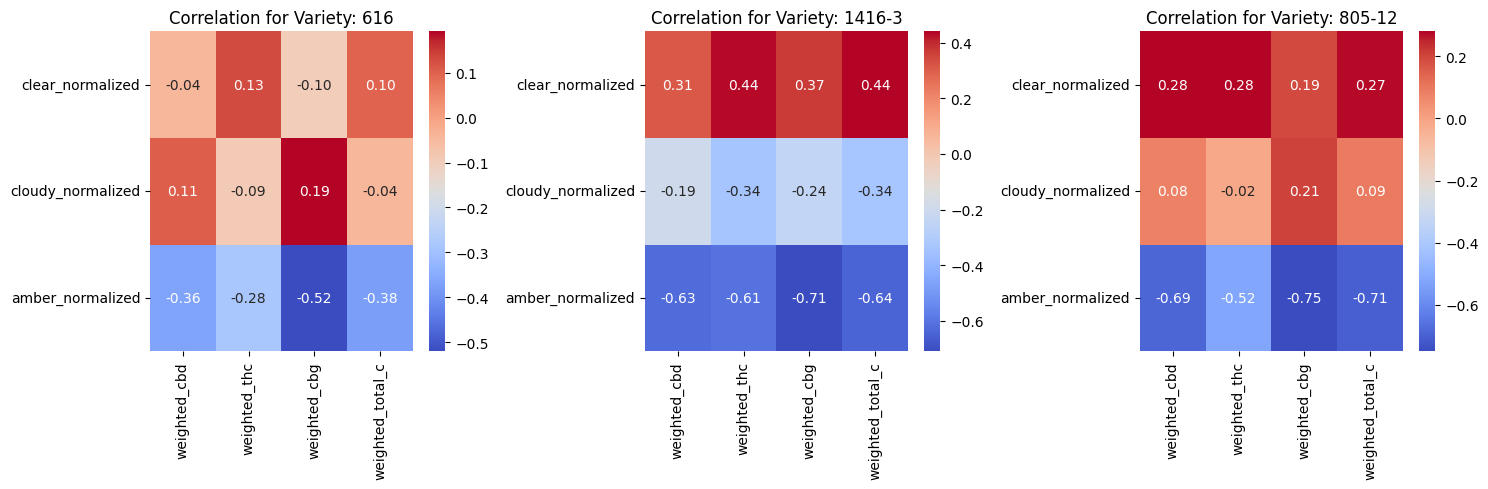

In [21]:
weighted_corr_columns = ["clear_normalized", "cloudy_normalized", "amber_normalized"] + weighted_hplc_cols
plot_variety_heatmaps(merged_df, 'var', weighted_corr_columns, trichome_vars, weighted_hplc_cols)

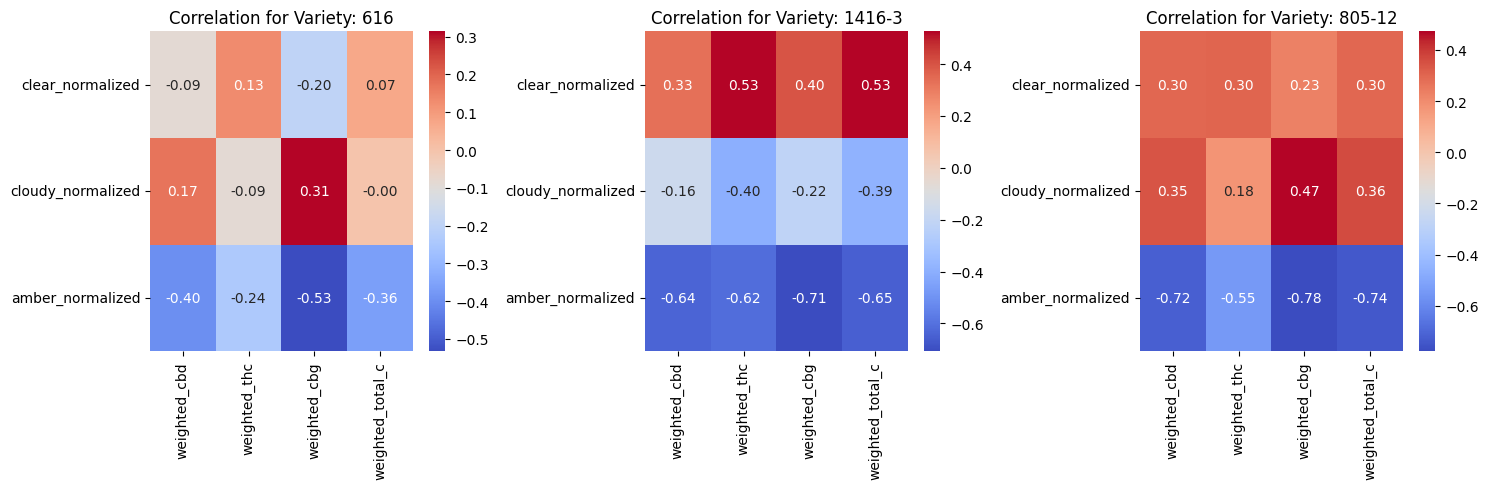

In [22]:
# Compute weighted averages of cannabinoids based on trichome proportions
df_greenhouse["weighted_cbd"] = df_greenhouse["clear_normalized"] * df_greenhouse["total_cbd"] + df_greenhouse["cloudy_normalized"] * df_greenhouse["total_cbd"] + df_greenhouse["amber_normalized"] * df_greenhouse["total_cbd"]
df_greenhouse["weighted_thc"] = df_greenhouse["clear_normalized"] * df_greenhouse["total_thc"] + df_greenhouse["cloudy_normalized"] * df_greenhouse["total_thc"] + df_greenhouse["amber_normalized"] * df_greenhouse["total_thc"]
df_greenhouse["weighted_cbg"] = df_greenhouse["clear_normalized"] * df_greenhouse["total_cbg"] + df_greenhouse["cloudy_normalized"] * df_greenhouse["total_cbg"] + df_greenhouse["amber_normalized"] * df_greenhouse["total_cbg"]
df_greenhouse["weighted_total_c"] = df_greenhouse["clear_normalized"] * df_greenhouse["total_c"] + df_greenhouse["cloudy_normalized"] * df_greenhouse["total_c"] + df_greenhouse["amber_normalized"] * df_greenhouse["total_c"]

plot_variety_heatmaps(df_greenhouse, 'var', weighted_corr_columns, trichome_vars, weighted_hplc_cols)

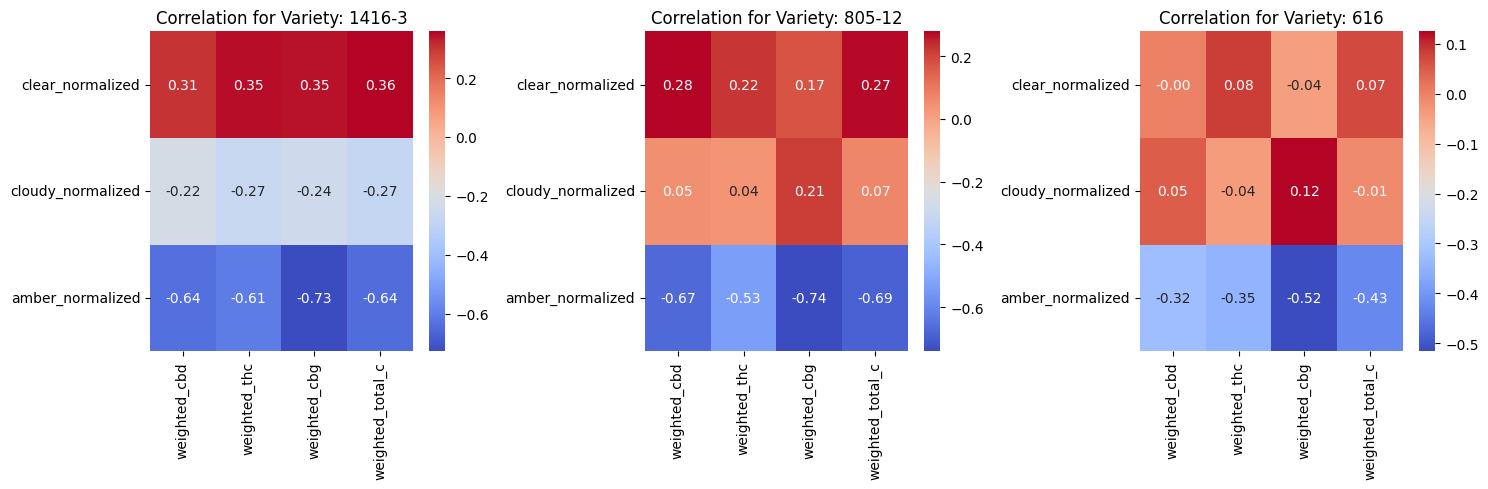

In [23]:
# Compute weighted averages of cannabinoids based on trichome proportions
# Compute weighted averages of cannabinoids based on trichome proportions
df_lab["weighted_cbd"] = df_lab["clear_normalized"] * df_lab["total_cbd"] + df_lab["cloudy_normalized"] * df_lab["total_cbd"] + df_lab["amber_normalized"] * df_lab["total_cbd"]
df_lab["weighted_thc"] = df_lab["clear_normalized"] * df_lab["total_thc"] + df_lab["cloudy_normalized"] * df_lab["total_thc"] + df_lab["amber_normalized"] * df_lab["total_thc"]
df_lab["weighted_cbg"] = df_lab["clear_normalized"] * df_lab["total_cbg"] + df_lab["cloudy_normalized"] * df_lab["total_cbg"] + df_lab["amber_normalized"] * df_lab["total_cbg"]
df_lab["weighted_total_c"] = df_lab["clear_normalized"] * df_lab["total_c"] + df_lab["cloudy_normalized"] * df_lab["total_c"] + df_lab["amber_normalized"] * df_lab["total_c"]

plot_variety_heatmaps(df_lab, 'var', weighted_corr_columns, trichome_vars, weighted_hplc_cols)


In [24]:
import statsmodels.api as sm

def analyze_trichome_cannabinoid_relationship(df, trichome_vars, target_cannabinoid, specific_trichome='amber_normalized'):
    """
    Perform visual and regression analysis of trichome proportions and cannabinoid levels.
    """
    unique_varieties = df["var"].unique()

    for var in unique_varieties:
        subset_df = df[df["var"] == var]
        
        print(f"\n### Analysis for Variety: {var} ###\n")

        # Scatter plot: Specific trichome vs target cannabinoid
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=specific_trichome, y=target_cannabinoid, data=subset_df)
        plt.xlabel(f'Normalized {specific_trichome.capitalize()} Count')
        plt.ylabel(target_cannabinoid.replace("_", " ").title())
        plt.title(f'Relationship between {specific_trichome.capitalize()} Trichomes and {target_cannabinoid} - {var}')
        plt.show()

        # Regression Analysis: Predict target cannabinoid from all trichome proportions
        X = subset_df[trichome_vars]
        y = subset_df[target_cannabinoid]
        
        # Add constant for intercept
        X = sm.add_constant(X)

        # Fit OLS regression model
        model = sm.OLS(y, X).fit()
        print(model.summary())

        # Visualize regression fit for the specific trichome
        sns.lmplot(x=specific_trichome, y=target_cannabinoid, data=subset_df, aspect=1.5, line_kws={'color': 'red'})
        plt.xlabel(f'Normalized {specific_trichome.capitalize()}')
        plt.ylabel(target_cannabinoid.replace("_", " ").title())
        plt.title(f'Linear Fit: {specific_trichome.capitalize()} vs {target_cannabinoid} - {var}')
        plt.show()



### Analysis for Variety: 616 ###



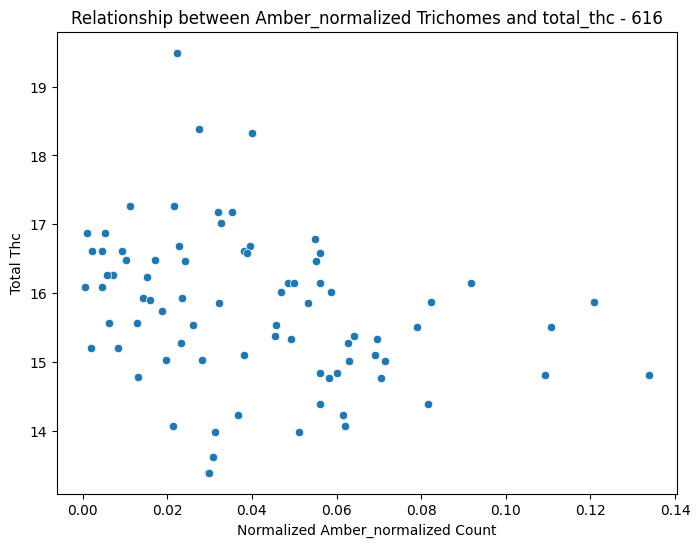

                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.453
Date:                Fri, 14 Feb 2025   Prob (F-statistic):             0.0697
Time:                        19:52:28   Log-Likelihood:                -118.27
No. Observations:                  80   AIC:                             244.5
Df Residuals:                      76   BIC:                             254.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2534.1415   2927.53

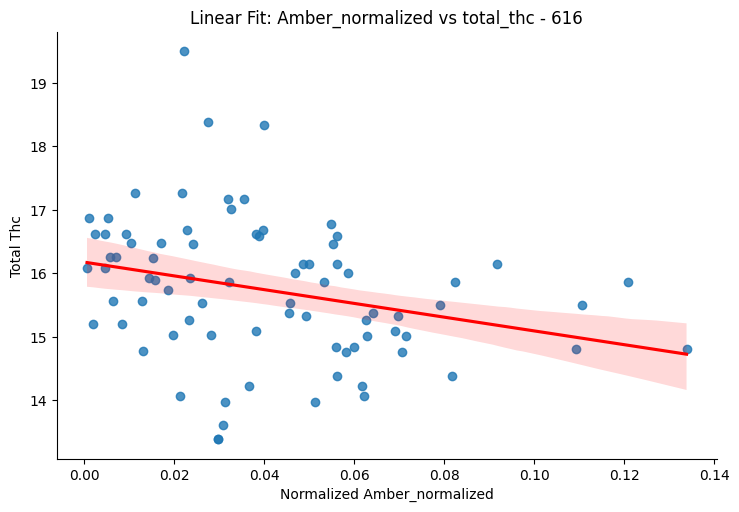


### Analysis for Variety: 1416-3 ###



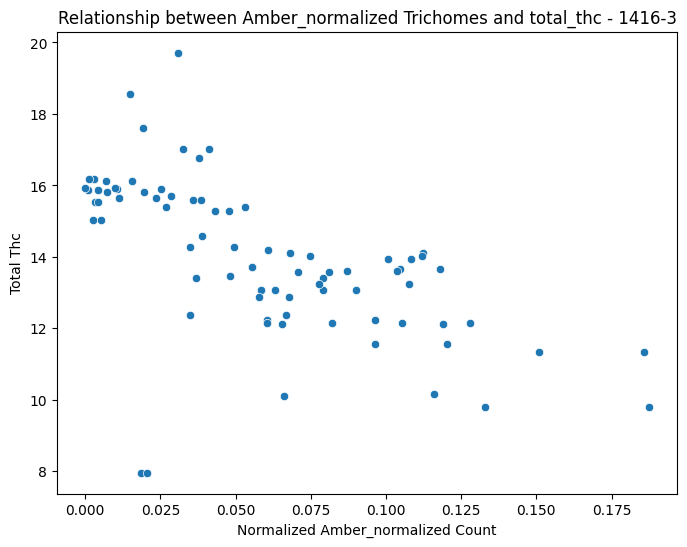

                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     15.15
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           8.03e-08
Time:                        19:52:30   Log-Likelihood:                -156.32
No. Observations:                  80   AIC:                             320.6
Df Residuals:                      76   BIC:                             330.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1061.4456   4662.13

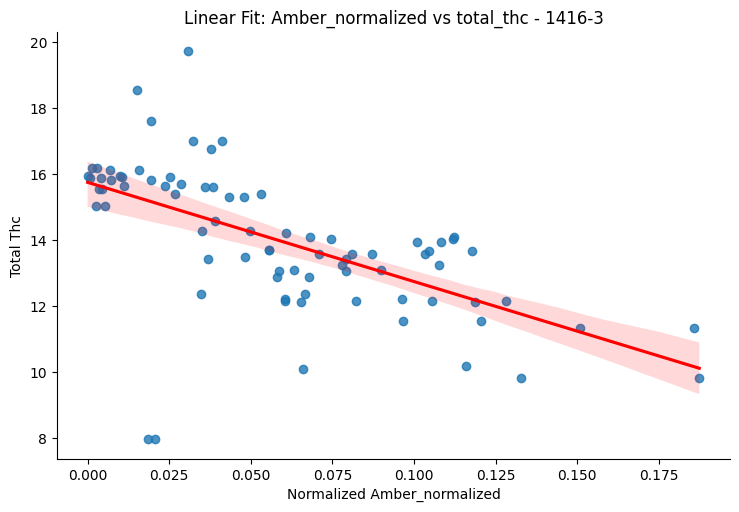


### Analysis for Variety: 805-12 ###



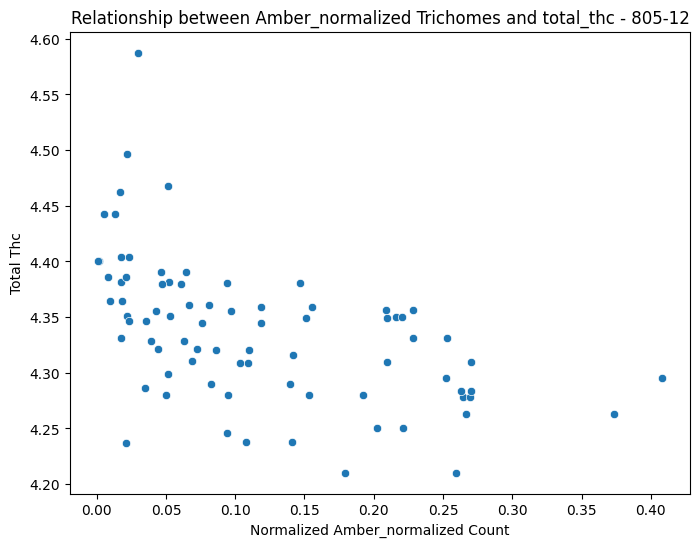

                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     10.38
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           8.63e-06
Time:                        19:52:31   Log-Likelihood:                 118.20
No. Observations:                  79   AIC:                            -228.4
Df Residuals:                      75   BIC:                            -218.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               176.9216    126.37

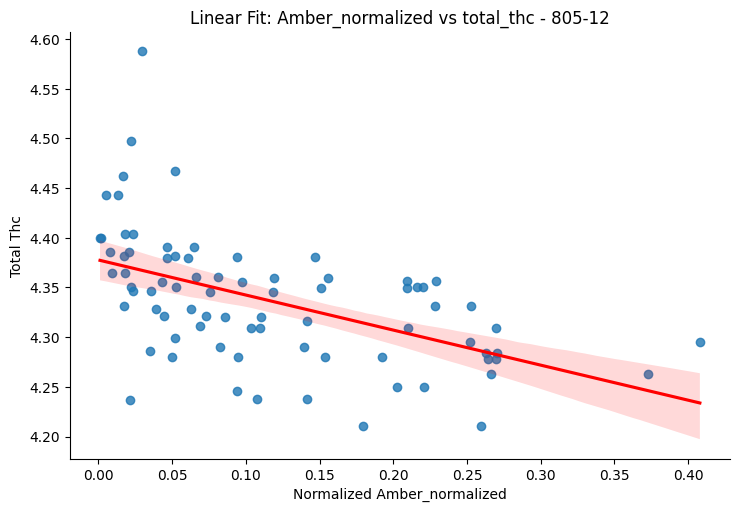


### Analysis for Variety: 616 ###



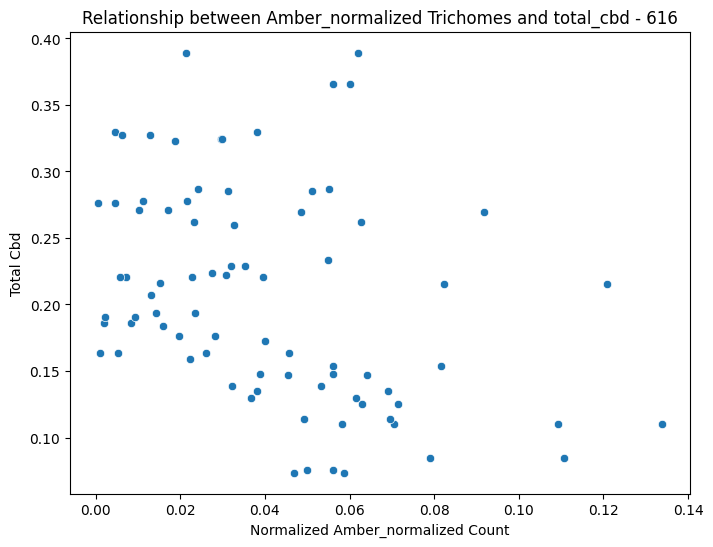

                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     6.341
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           0.000678
Time:                        19:52:32   Log-Likelihood:                 96.506
No. Observations:                  80   AIC:                            -185.0
Df Residuals:                      76   BIC:                            -175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -258.7914    199.78

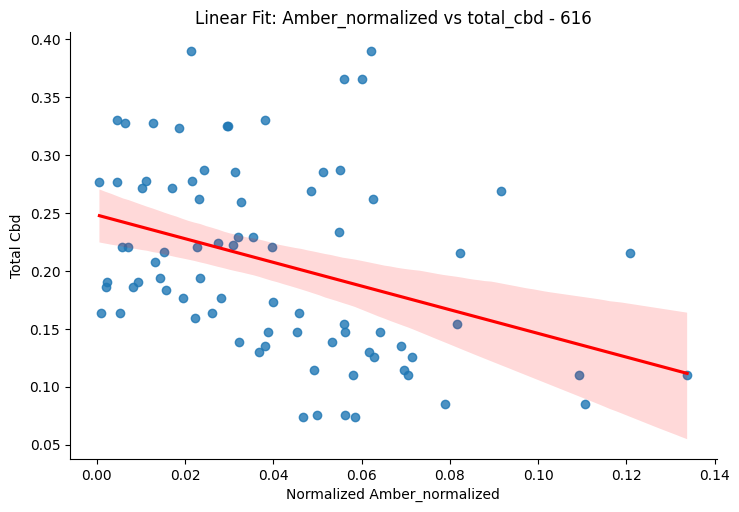


### Analysis for Variety: 1416-3 ###



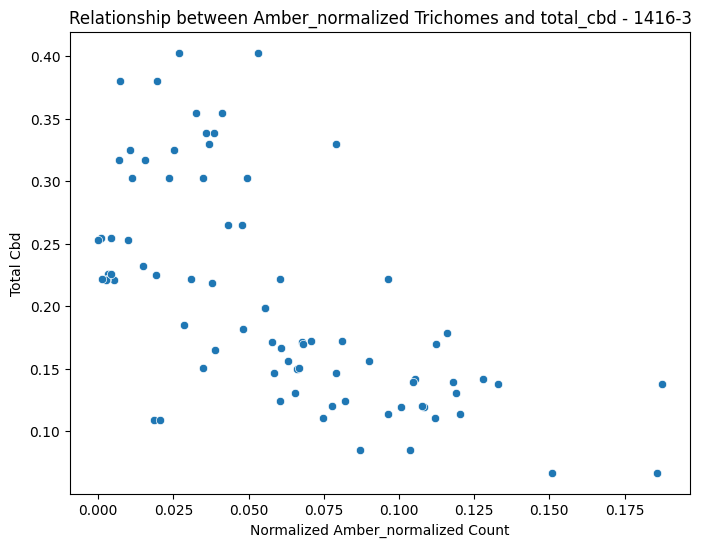

                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     18.27
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           5.04e-09
Time:                        19:52:34   Log-Likelihood:                 104.28
No. Observations:                  80   AIC:                            -200.6
Df Residuals:                      76   BIC:                            -191.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               209.4502    179.42

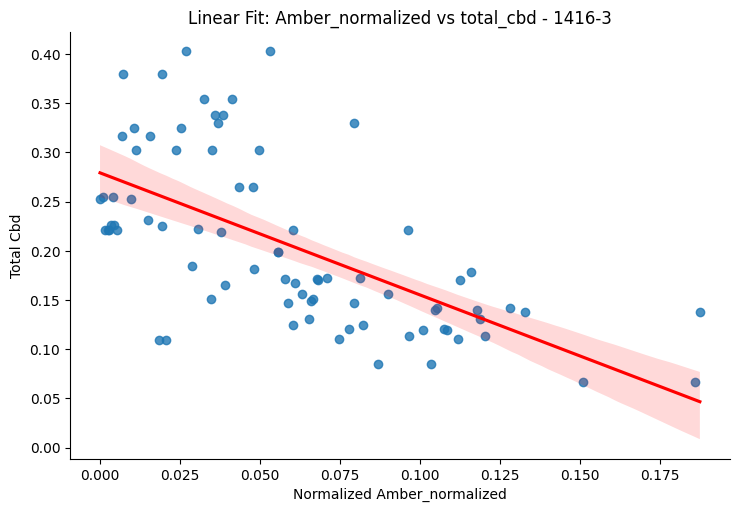


### Analysis for Variety: 805-12 ###



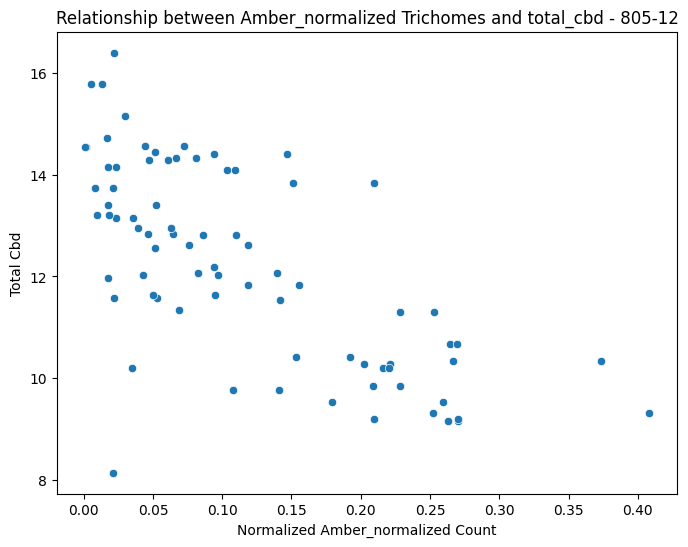

                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     24.79
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           3.01e-11
Time:                        19:52:35   Log-Likelihood:                -137.19
No. Observations:                  79   AIC:                             282.4
Df Residuals:                      75   BIC:                             291.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6412.6600   3203.74

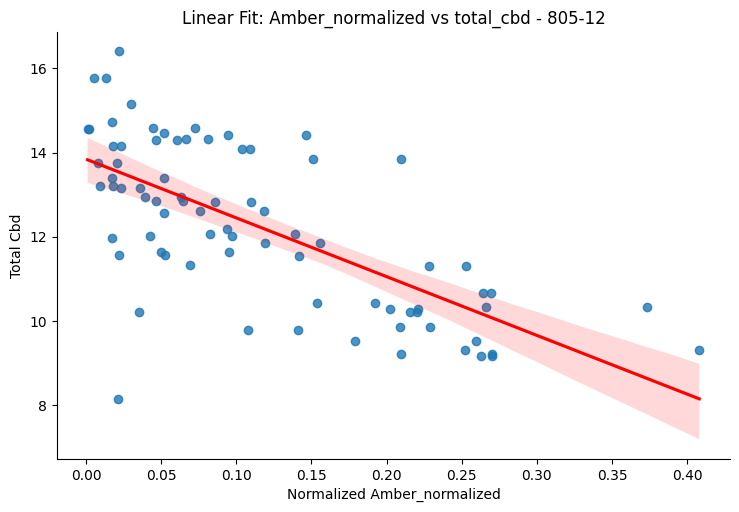


### Analysis for Variety: 616 ###



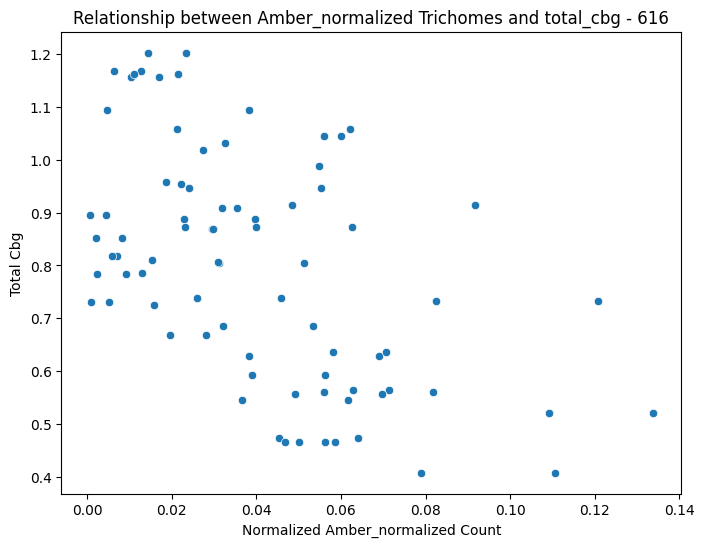

                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     17.27
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.20e-08
Time:                        19:52:36   Log-Likelihood:                 29.449
No. Observations:                  80   AIC:                            -50.90
Df Residuals:                      76   BIC:                            -41.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -358.4701    461.95

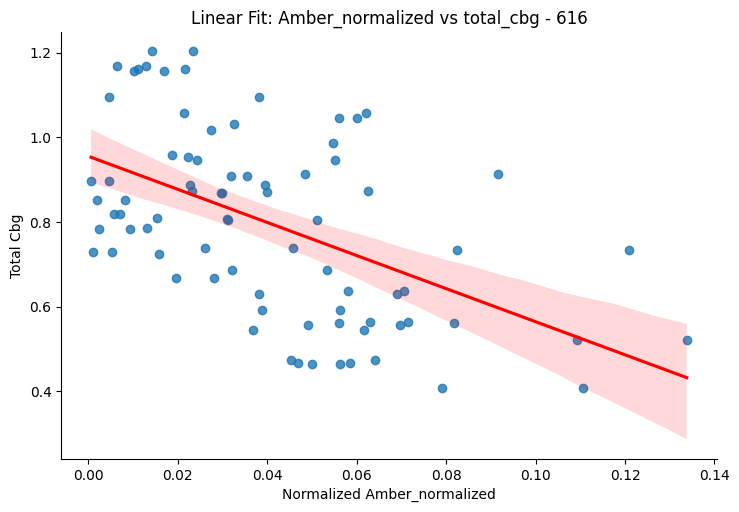


### Analysis for Variety: 1416-3 ###



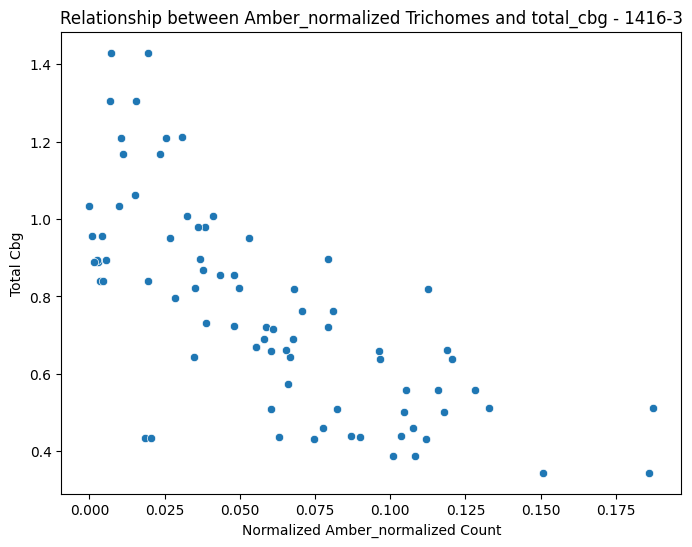

                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     27.30
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           4.38e-12
Time:                        19:52:37   Log-Likelihood:                 22.517
No. Observations:                  80   AIC:                            -37.03
Df Residuals:                      76   BIC:                            -27.51
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               332.4760    498.59

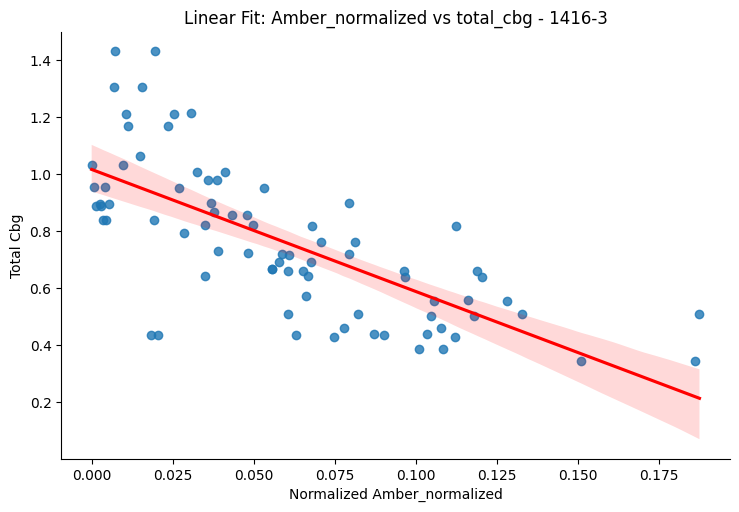


### Analysis for Variety: 805-12 ###



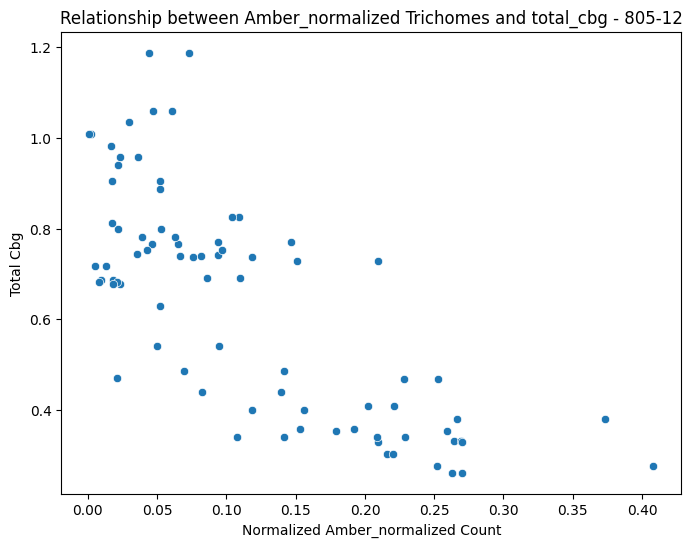

                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     35.58
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           2.08e-14
Time:                        19:52:38   Log-Likelihood:                 33.459
No. Observations:                  79   AIC:                            -58.92
Df Residuals:                      75   BIC:                            -49.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               391.8266    369.40

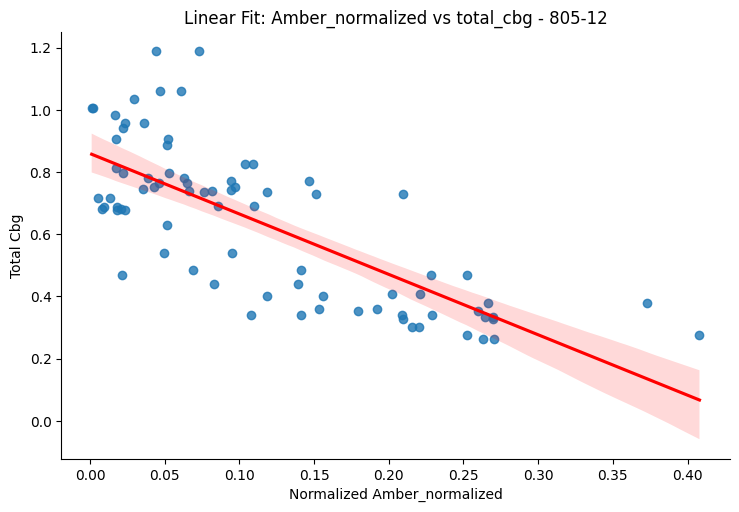

In [25]:
trichome_vars = ["clear_normalized", "cloudy_normalized", "amber_normalized"]

# Run the analysis for total THC
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_thc")

# Run the analysis for total CBD
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbd")

# Run the analysis for total CBG
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbg")


In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trichome_cannabinoid_relationship(df, trichome_vars, target_cannabinoid, specific_trichome='amber_normalized'):
    """
    Perform regression analysis of trichome proportions and cannabinoid levels, 
    and visualize all varieties in a single regression plot.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing trichome and cannabinoid data.
    trichome_vars (list): List of trichome proportion columns (e.g., ['clear_normalized', 'cloudy_normalized', 'amber_normalized']).
    target_cannabinoid (str): The target cannabinoid column to predict (e.g., 'total_thc').
    specific_trichome (str): The trichome variable to visualize in scatter plots and regression fit (default: 'amber_normalized').

    Returns:
    None (Displays a single plot and regression summary for each variety)
    """
    unique_varieties = df["var"].unique()

    # Set up a single plot for all varieties
    plt.figure(figsize=(10, 6))
    
    for var in unique_varieties:
        subset_df = df[df["var"] == var]

        # Regression Analysis: Predict target cannabinoid from all trichome proportions
        X = subset_df[trichome_vars]
        y = subset_df[target_cannabinoid]

        # Add constant for intercept
        X = sm.add_constant(X)

        # Fit OLS regression model
        model = sm.OLS(y, X).fit()
        print(f"\n### Regression Summary for Variety: {var} ###")
        print(model.summary())

        # Visualize regression fit for the specific trichome
        sns.regplot(x=specific_trichome, y=target_cannabinoid, data=subset_df, label=f"Variety {var}", scatter_kws={'alpha': 0.5}, line_kws={'lw': 2})

    plt.xlabel(f'Normalized {specific_trichome.capitalize()}')
    plt.ylabel(target_cannabinoid.replace("_", " ").title())
    plt.title(f'Linear Regression: {specific_trichome.capitalize()} vs {target_cannabinoid}')
    plt.legend(title="Cannabis Variety")
    plt.grid(True)
    plt.show()



### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.453
Date:                Fri, 14 Feb 2025   Prob (F-statistic):             0.0697
Time:                        19:52:39   Log-Likelihood:                -118.27
No. Observations:                  80   AIC:                             244.5
Df Residuals:                      76   BIC:                             254.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

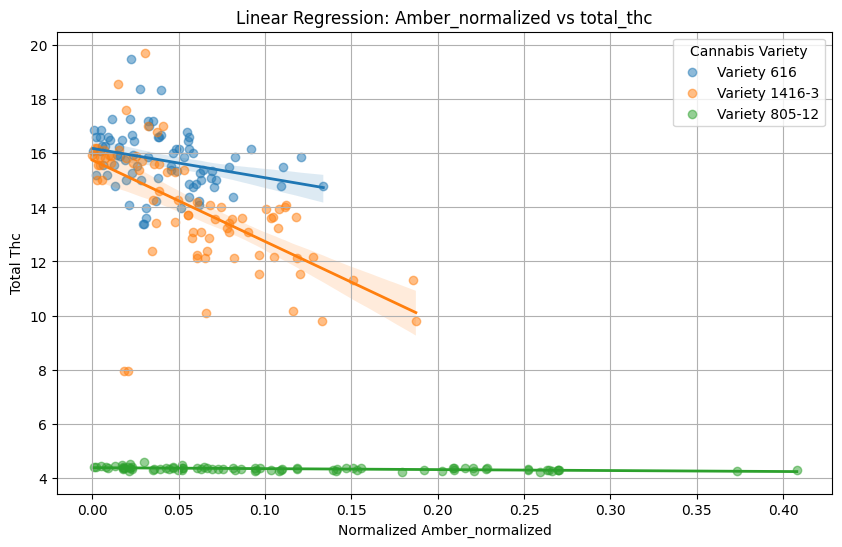


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     6.341
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           0.000678
Time:                        19:52:41   Log-Likelihood:                 96.506
No. Observations:                  80   AIC:                            -185.0
Df Residuals:                      76   BIC:                            -175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

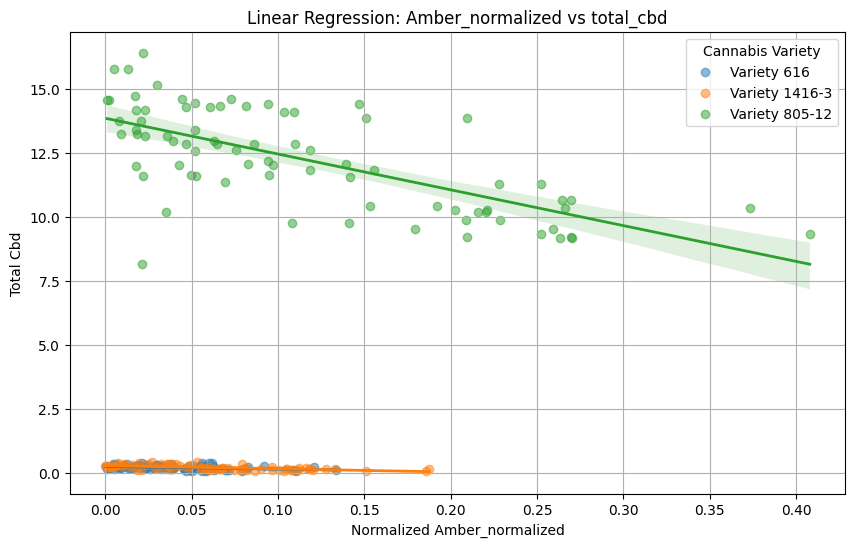


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     17.27
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.20e-08
Time:                        19:52:42   Log-Likelihood:                 29.449
No. Observations:                  80   AIC:                            -50.90
Df Residuals:                      76   BIC:                            -41.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

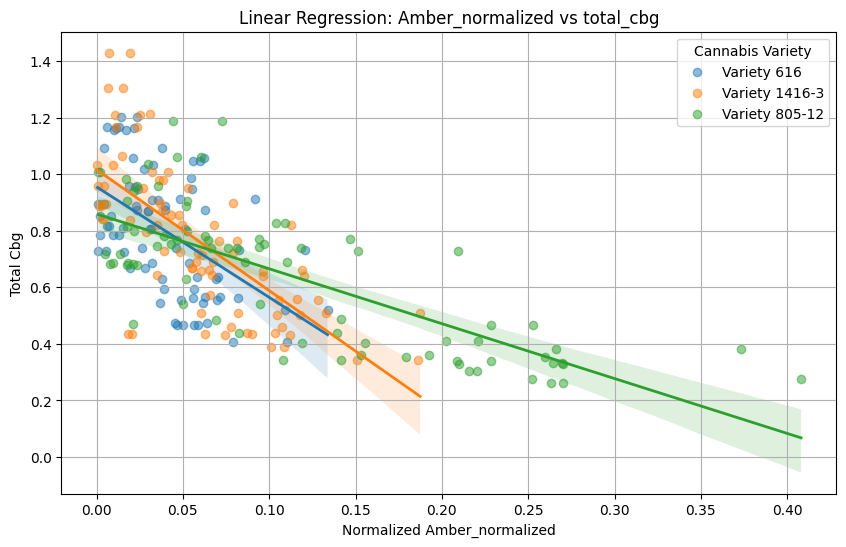

In [27]:
trichome_vars = ["clear_normalized", "cloudy_normalized", "amber_normalized"]

# Run the analysis for total THC
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_thc")

# Run the analysis for total CBD
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbd")

# Run the analysis for total CBG
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbg")



### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.453
Date:                Fri, 14 Feb 2025   Prob (F-statistic):             0.0697
Time:                        20:01:42   Log-Likelihood:                -118.27
No. Observations:                  80   AIC:                             244.5
Df Residuals:                      76   BIC:                             254.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

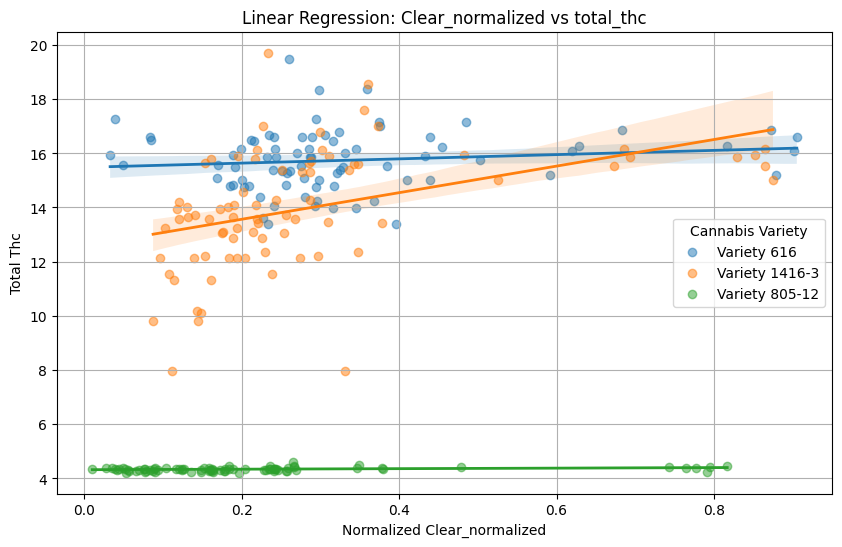


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     6.341
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           0.000678
Time:                        20:01:44   Log-Likelihood:                 96.506
No. Observations:                  80   AIC:                            -185.0
Df Residuals:                      76   BIC:                            -175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

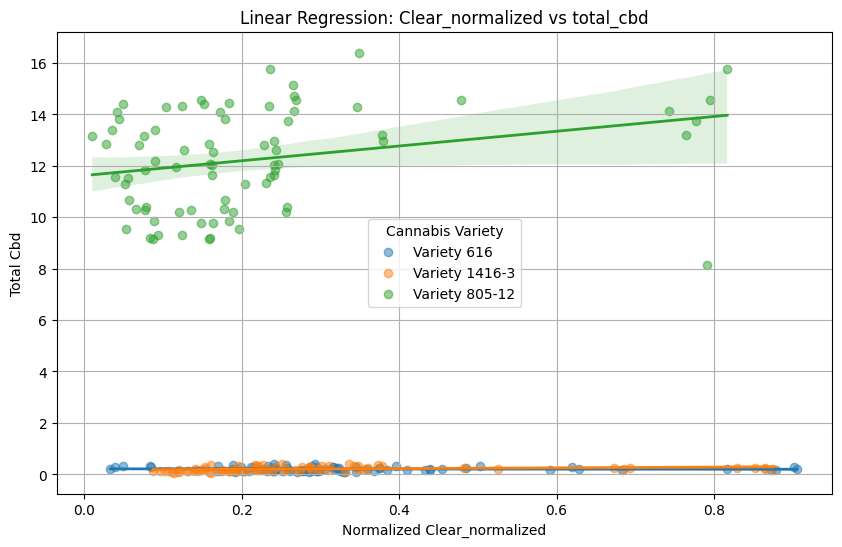


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     17.27
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.20e-08
Time:                        20:01:45   Log-Likelihood:                 29.449
No. Observations:                  80   AIC:                            -50.90
Df Residuals:                      76   BIC:                            -41.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

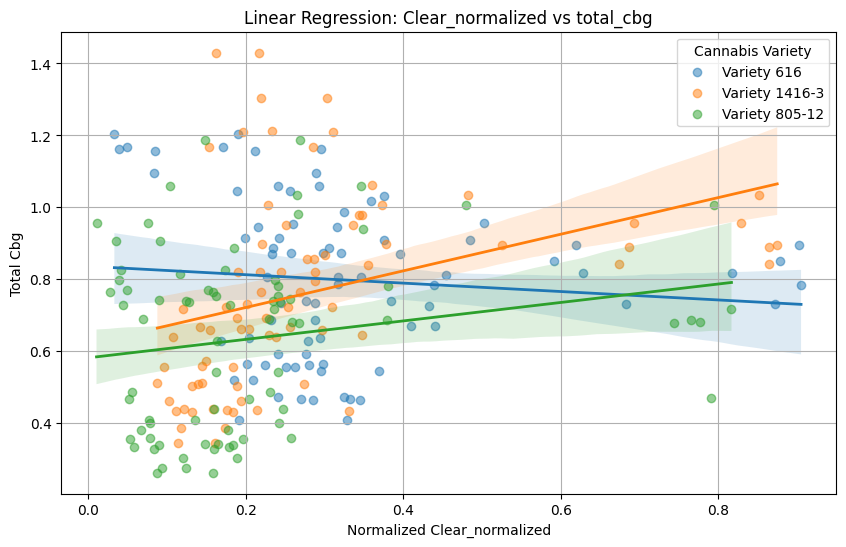

In [28]:
# Run the analysis for total THC
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_thc", specific_trichome="clear_normalized")

# Run the analysis for total CBD
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbd", specific_trichome="clear_normalized")

# Run the analysis for total CBG
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbg", specific_trichome="clear_normalized")


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_thc   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.453
Date:                Fri, 14 Feb 2025   Prob (F-statistic):             0.0697
Time:                        20:02:37   Log-Likelihood:                -118.27
No. Observations:                  80   AIC:                             244.5
Df Residuals:                      76   BIC:                             254.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

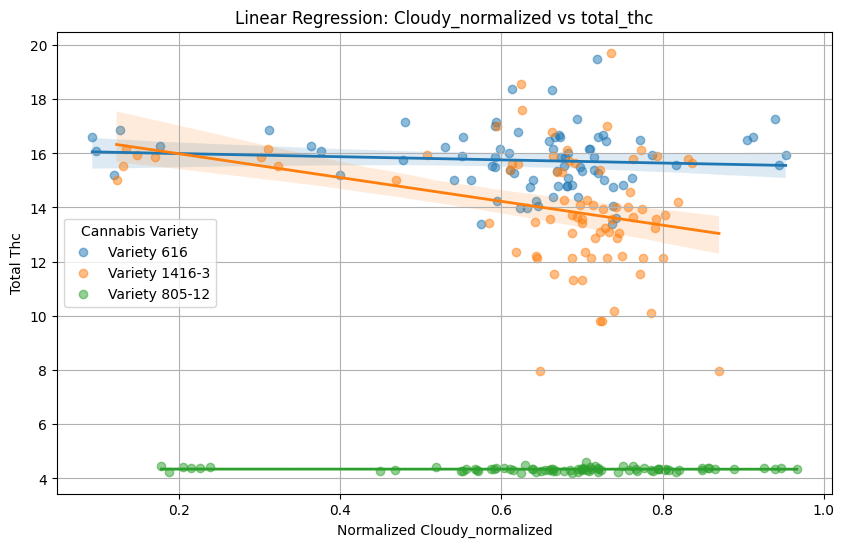


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbd   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     6.341
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           0.000678
Time:                        20:02:40   Log-Likelihood:                 96.506
No. Observations:                  80   AIC:                            -185.0
Df Residuals:                      76   BIC:                            -175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

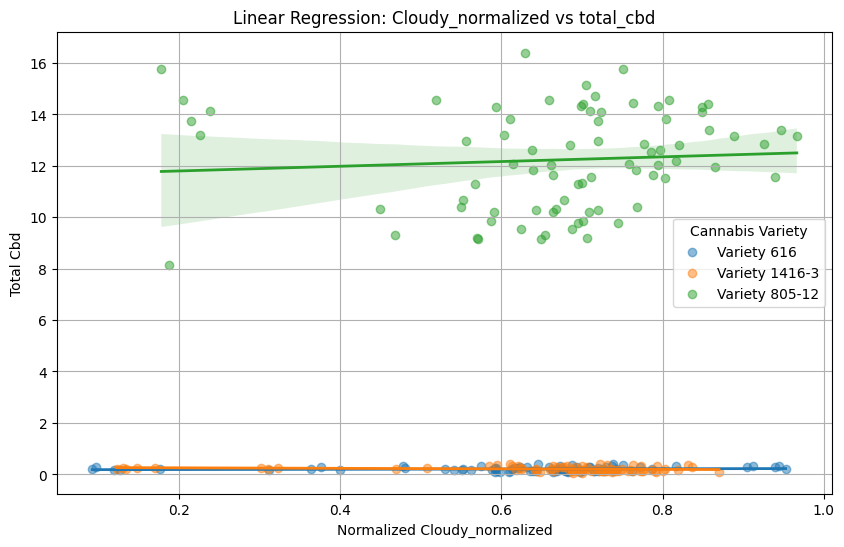


### Regression Summary for Variety: 616 ###
                            OLS Regression Results                            
Dep. Variable:              total_cbg   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     17.27
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.20e-08
Time:                        20:02:41   Log-Likelihood:                 29.449
No. Observations:                  80   AIC:                            -50.90
Df Residuals:                      76   BIC:                            -41.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

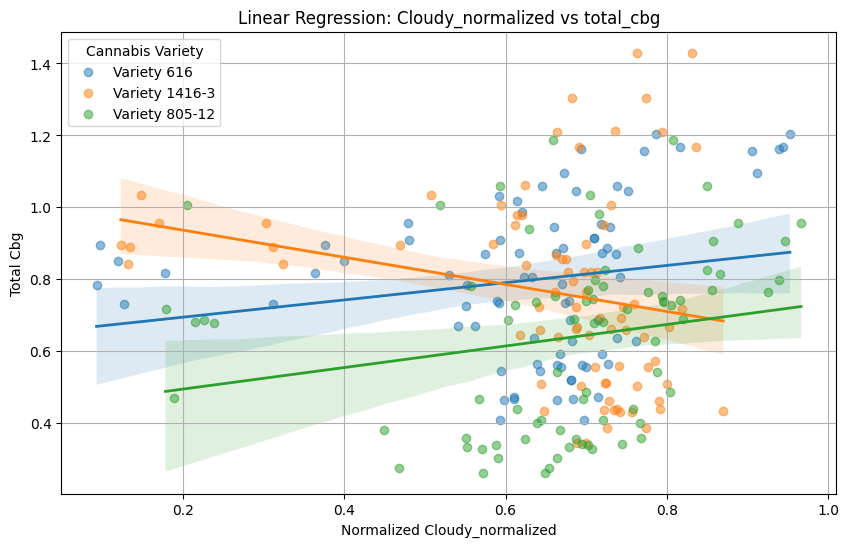

In [29]:
# Run the analysis for total THC
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_thc", specific_trichome="cloudy_normalized")

# Run the analysis for total CBD
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbd", specific_trichome="cloudy_normalized")

# Run the analysis for total CBG
analyze_trichome_cannabinoid_relationship(merged_df, trichome_vars, "total_cbg", specific_trichome="cloudy_normalized")